### Dataset of Television Brands available in the Indian Market

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
TV_dataset = pd.read_csv(r'TV_Final.csv')
TV_dataset.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


#### About the raw data
This dataset is collected from an e-commerce website Flipkart of Television Brands available in the Indian Market 2021 using webscraping technique, contains 912 samples with 7 attributes, with some missing values. Our team find it in Kaggle, see https://www.kaggle.com/datasets/devsubhash/television-brands-ecommerce-dataset.

Here's some columns
* Brand (qualitative variable): This indicates the manufacturer of the product i.e. Television
* Resolution (qualitative variable): This has multiple categories and indicates the type of display i.e. LED, HD LED, etc.
* Size (quantitative variable): This indicates the screen size in inches
* Selling Price (quantitative variable): This column has the Selling Price or the Discounted Price of the product
* Original Price (quantitative variable): This includes the Original Price of the product from the manufacturer.
* Operating system (qualitative variable): This categorical variable shows the type of OS like Android, Linux, etc.
* Rating (dependent variable y): Average customer ratings on a scale of 5.

In [29]:
# consider Rating is crucial in the research, has to make sure its accuracy, plus we got sufficient observations, here we simply drop Nan lines
TV_dataset.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

In [32]:
TV_dataset_preprocessing = TV_dataset.copy()

In [33]:
TV_dataset_preprocessing = TV_dataset_preprocessing.dropna(subset=['Rating'])
TV_dataset_preprocessing.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [34]:
TV_dataset_preprocessing.isnull().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    9
Rating              0
dtype: int64

In [35]:
# for mostly are Android, it;s rational to fill Nan in Operating System as mode
TV_dataset_preprocessing['Operating System'].value_counts()

Android      383
Tizen         99
Linux         97
WebOS         75
HomeOS        20
VIDAA          8
FireTV OS      1
Name: Operating System, dtype: int64

In [36]:
TV_dataset_preprocessing['Operating System'] = TV_dataset_preprocessing['Operating System'].fillna(TV_dataset_preprocessing['Operating System'].mode()[0])

In [37]:
# now we filled all Nan
TV_dataset_preprocessing.isnull().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

In [38]:
# here're some info about the data, after processing, we got 692 observations for now
TV_dataset_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             692 non-null    object 
 1   Resolution        692 non-null    object 
 2   Size              692 non-null    int64  
 3   Selling Price     692 non-null    int64  
 4   Original Price    692 non-null    int64  
 5   Operating System  692 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 43.2+ KB


In [39]:
TV_dataset_preprocessing[['Brand', 'Resolution', 'Operating System']].nunique()

Brand               53
Resolution           5
Operating System     7
dtype: int64

In [40]:
# for HD plasma, it is an old type of TV resolution and have barely selling in the market, ergo, omit it!
TV_dataset_preprocessing['Resolution'].value_counts()

Ultra HD LED     294
Full HD LED      181
HD LED           180
QLED Ultra HD     35
HD Plasma          2
Name: Resolution, dtype: int64

In [41]:
TV_dataset_preprocessing = TV_dataset_preprocessing.drop(TV_dataset_preprocessing[TV_dataset_preprocessing['Resolution'] == 'HD Plasma'].index)

In [42]:
# then we classify QLED Ultra HD as Ultra HD LED, because QLED is nothing than an abbreviation of Quantum Dot LED, and we want to focus on the level of Resolution, that is, Ultra, Full or normal
TV_dataset_preprocessing['Resolution'] = TV_dataset_preprocessing['Resolution'].replace(['QLED Ultra HD'], 'Ultra HD LED')
TV_dataset_preprocessing['Resolution'].value_counts()

Ultra HD LED    329
Full HD LED     181
HD LED          180
Name: Resolution, dtype: int64

In [43]:
# the majority of Operating System is Android, trying to simplify the variable as Android/not Android
TV_dataset_preprocessing['Operating System'].value_counts()

Android      392
Linux         97
Tizen         97
WebOS         75
HomeOS        20
VIDAA          8
FireTV OS      1
Name: Operating System, dtype: int64

In [44]:
TV_dataset_preprocessing['Operating System'].loc[TV_dataset_preprocessing['Operating System'] != 'Android'] = 'not Android'
TV_dataset_preprocessing['Operating System'].value_counts()

C:\Users\ytx_q\python3.8\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Android        392
not Android    298
Name: Operating System, dtype: int64

In [45]:
# then we deal with the brand, as seen, there're so many
TV_dataset_preprocessing['Brand'] = TV_dataset_preprocessing['Brand'].str.strip()
TV_dataset_preprocessing['Brand'] = TV_dataset_preprocessing['Brand'].replace(['Samsung'],'SAMSUNG')
TV_dataset_preprocessing['Brand'].value_counts()

SAMSUNG             98
LG                  88
SONY                56
TCL                 36
Micromax            25
Vu                  23
Panasonic           19
Mi                  18
Thomson             18
PHILIPS             17
iFFALCON by TCL     16
Lloyd               15
MOTOROLA            15
KODAK               15
Blaupunkt           14
Haier               13
Sansui              13
Candes              12
Onida               12
Nokia               11
RGL                  9
CloudWalker          9
OnePlus              9
Coocaa               9
Acer                 9
MarQ by Flipkart     8
G-TEN                8
TOSHIBA              8
Adsun                7
Intex                7
realme               7
Hisense              7
JVC                  6
IMPEX                6
Compaq               5
Weston               5
HUIDI                5
Croma                5
DETEL                3
Dyanora              3
Infinix              3
MURPHY               3
Sharp                2
Onix       

In [46]:
# the point is to choose the top 4 brands that has the most market share in Indian e-market, then substitule the rest as Others for less competitive brands, so there would be 5 altogether. firm's main brand and sub-brand are considered two different brands here
TV_dataset_preprocessing['Brand'].loc[(TV_dataset_preprocessing['Brand'] != 'SAMSUNG') & (TV_dataset_preprocessing['Brand'] != 'LG') & (TV_dataset_preprocessing['Brand'] != 'SONY') & (TV_dataset_preprocessing['Brand'] != 'TCL')] = 'Others'
TV_dataset_preprocessing['Brand'].value_counts()

C:\Users\ytx_q\python3.8\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Others     412
SAMSUNG     98
LG          88
SONY        56
TCL         36
Name: Brand, dtype: int64

In [47]:
def convert2dummy(df, names):
    for name in names:
        df = df.join(pd.get_dummies(df[name], prefix = name))
    return df

In [48]:
#So for now we get a more decent dataset, transfer 
TV_dataset_preprocessing = convert2dummy(TV_dataset_preprocessing, ['Brand', 'Resolution', 'Operating System'])

In [49]:
TV_dataset_preprocessing.to_csv('TV_dataset_preprocessing.csv', index=False)

In [50]:
# then we continue, eliminate abnormal points
# first is to see though the distribution of each variable, start with y

Once again, a small reminder of these variables
* Brand (qualitative variable): This indicates the manufacturer of the product i.e. Television
* Resolution (qualitative variable): This has multiple categories and indicates the type of display i.e. LED, HD LED, etc.
* Size (quantitative variable): This indicates the screen size in inches
* Selling Price (quantitative variable): This column has the Selling Price or the Discounted Price of the product
* Original Price (quantitative variable): This includes the Original Price of the product from the manufacturer.
* Operating system (qualitative variable): This categorical variable shows the type of OS like Android, Linux, etc.
* Rating (dependent variable y): Average customer ratings on a scale of 5.

<ipython-input-51-a8fdd421da54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(TV_dataset_preprocessing['Rating'],  color=sns.desaturate('indianred', .8))


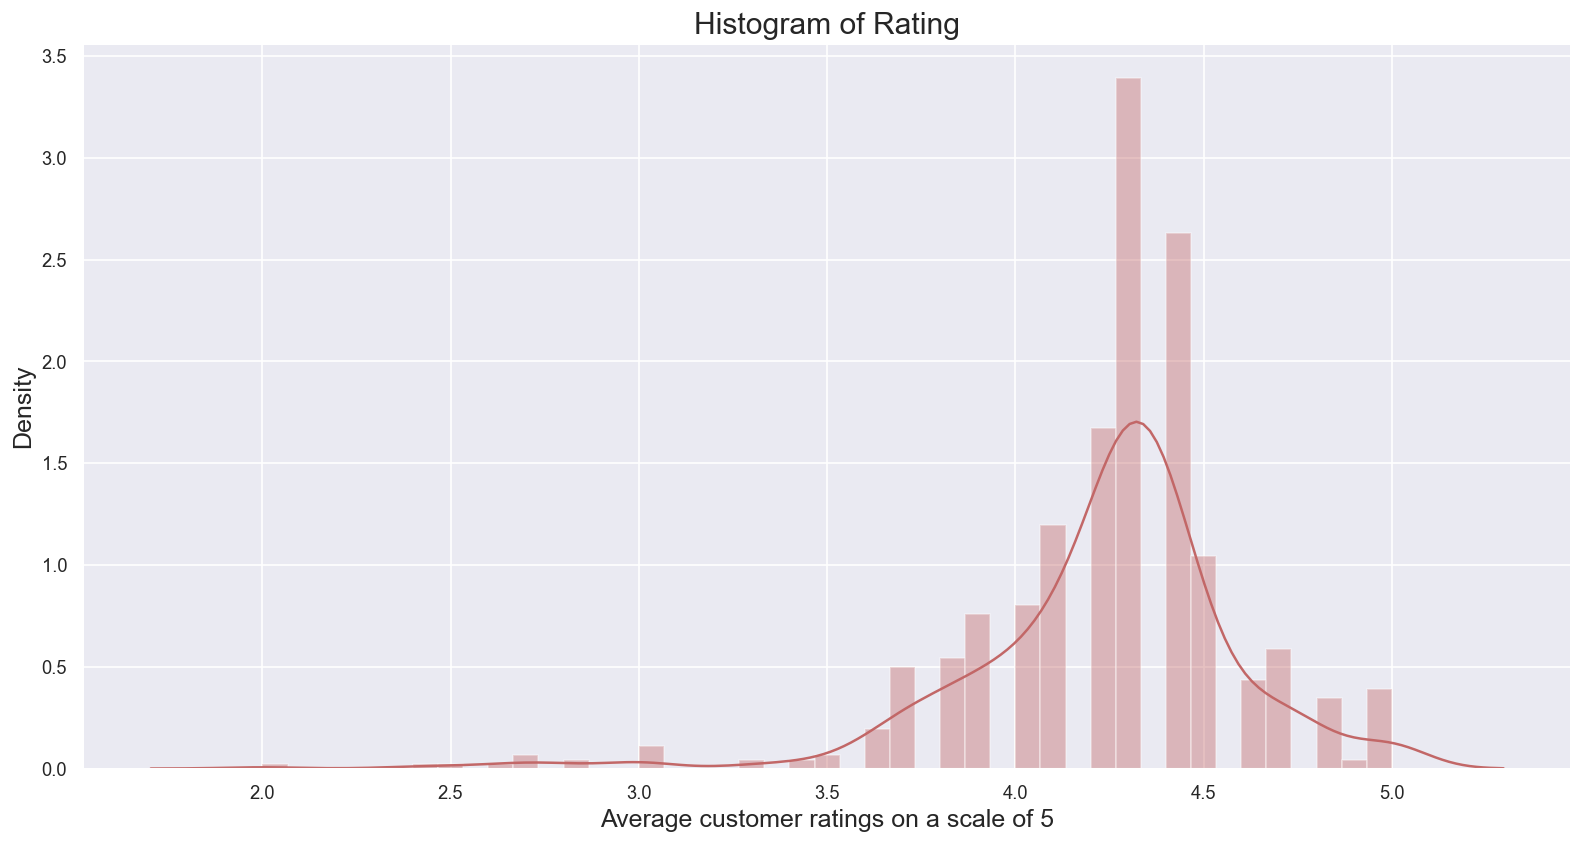

In [51]:
plt.figure(figsize=(16,8), dpi=120)
sns.set() 
ax = sns.distplot(TV_dataset_preprocessing['Rating'],  color=sns.desaturate('indianred', .8))
plt.title('Histogram of Rating', fontsize=18)
plt.xlabel('Average customer ratings on a scale of 5', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

As is seen, y is biased, most concentrated around 4 to 4.5, then let's check quantitative ones.

<ipython-input-52-e2433c8345a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(TV_dataset_preprocessing['Size '])


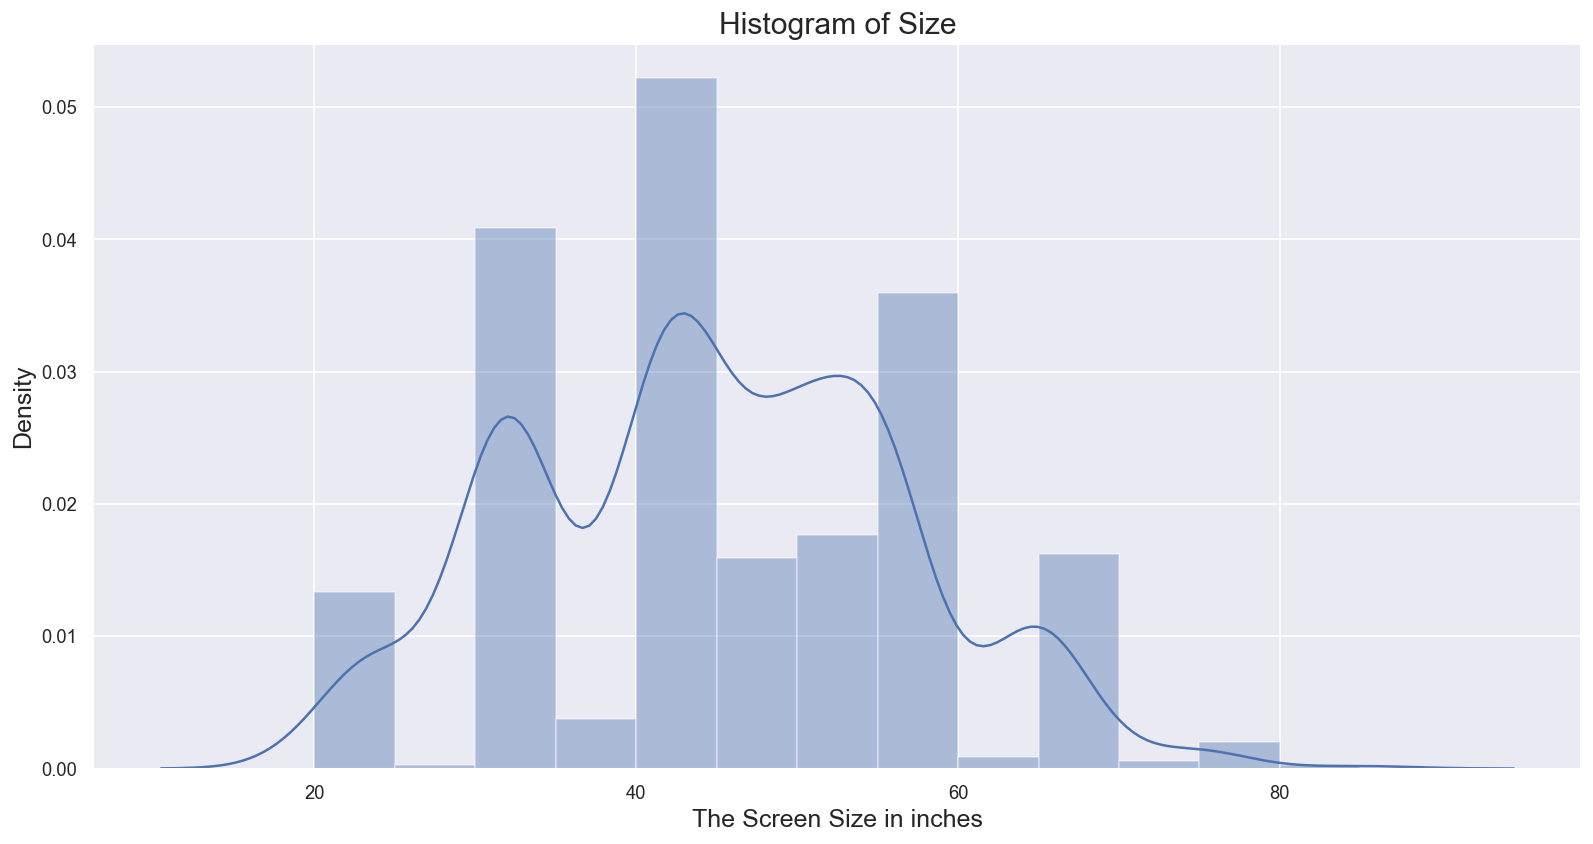

In [52]:
plt.figure(figsize=(16,8), dpi=120)
sns.set() 
ax = sns.distplot(TV_dataset_preprocessing['Size '])
plt.title('Histogram of Size', fontsize=18)
plt.xlabel('The Screen Size in inches', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

It seems to be high in the middle and low on both sides, bue also for these observations it doesn't seem like a normal distribution.

<ipython-input-53-8647a8e191a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(TV_dataset_preprocessing['Selling Price'], bins=50,)


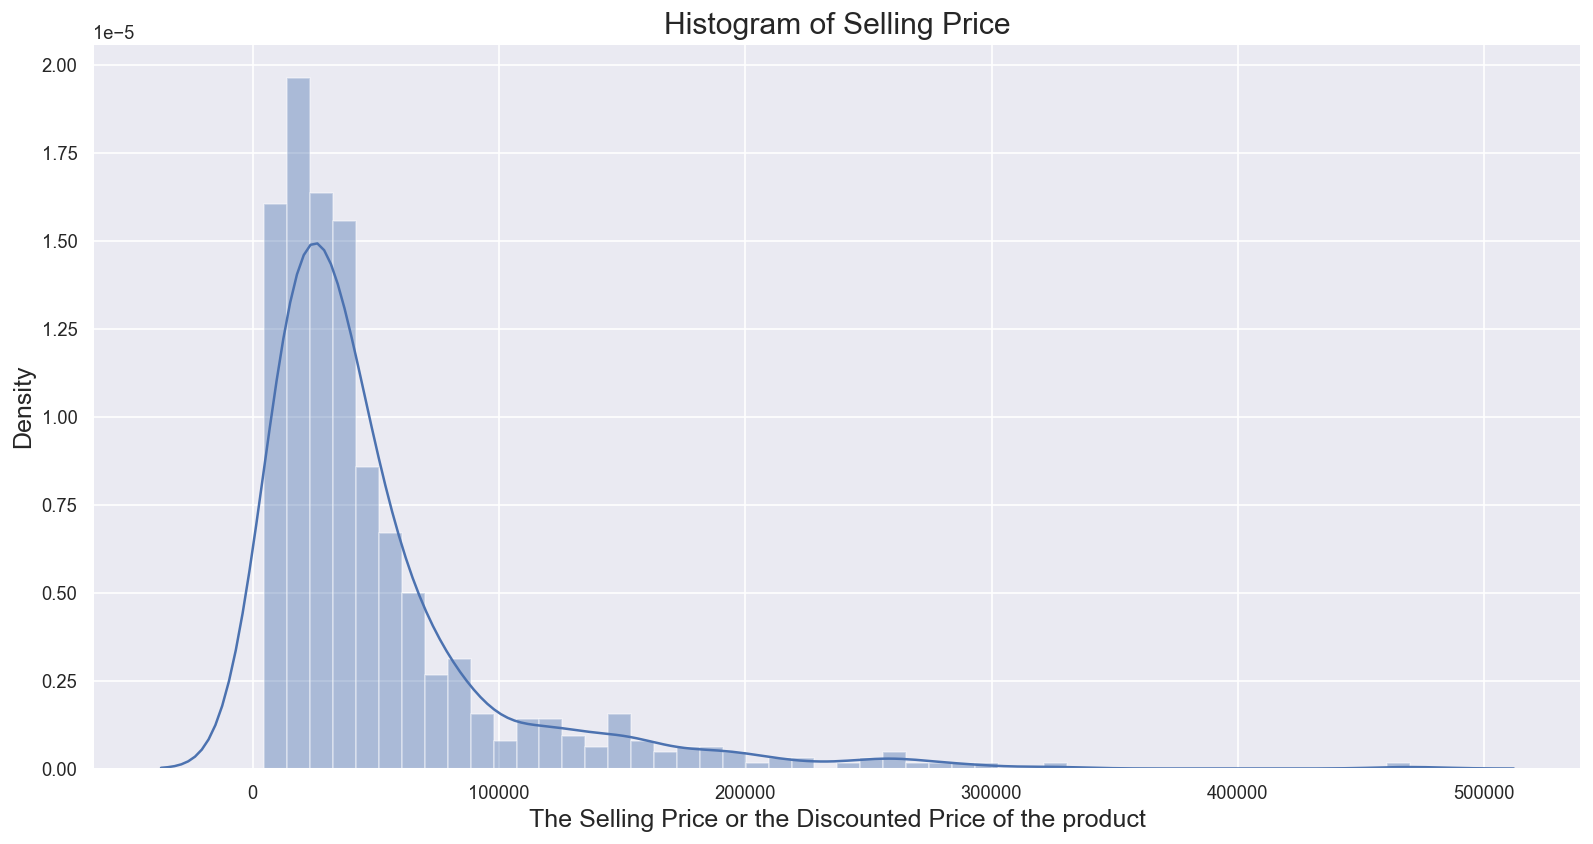

In [53]:
plt.figure(figsize=(16,8), dpi=120)
sns.set() 
ax = sns.distplot(TV_dataset_preprocessing['Selling Price'], bins=50,)
plt.title('Histogram of Selling Price', fontsize=18)
plt.xlabel('The Selling Price or the Discounted Price of the product', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

For the Selling Price, looks like log() transformation should be adapted. For such a skewed distribution, that is, the effect of a percentage change in price on Rating should be considered in the econometrics model.

In [54]:
import math
TV_dataset_preprocessing['lg_SP'] = TV_dataset_preprocessing['Selling Price'].apply(lambda x: math.log(x))
TV_dataset_preprocessing['lg_OP'] = TV_dataset_preprocessing['Original Price'].apply(lambda x: math.log(x))

<ipython-input-55-0830619b2a6e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(TV_dataset_preprocessing['lg_SP'], bins=50)


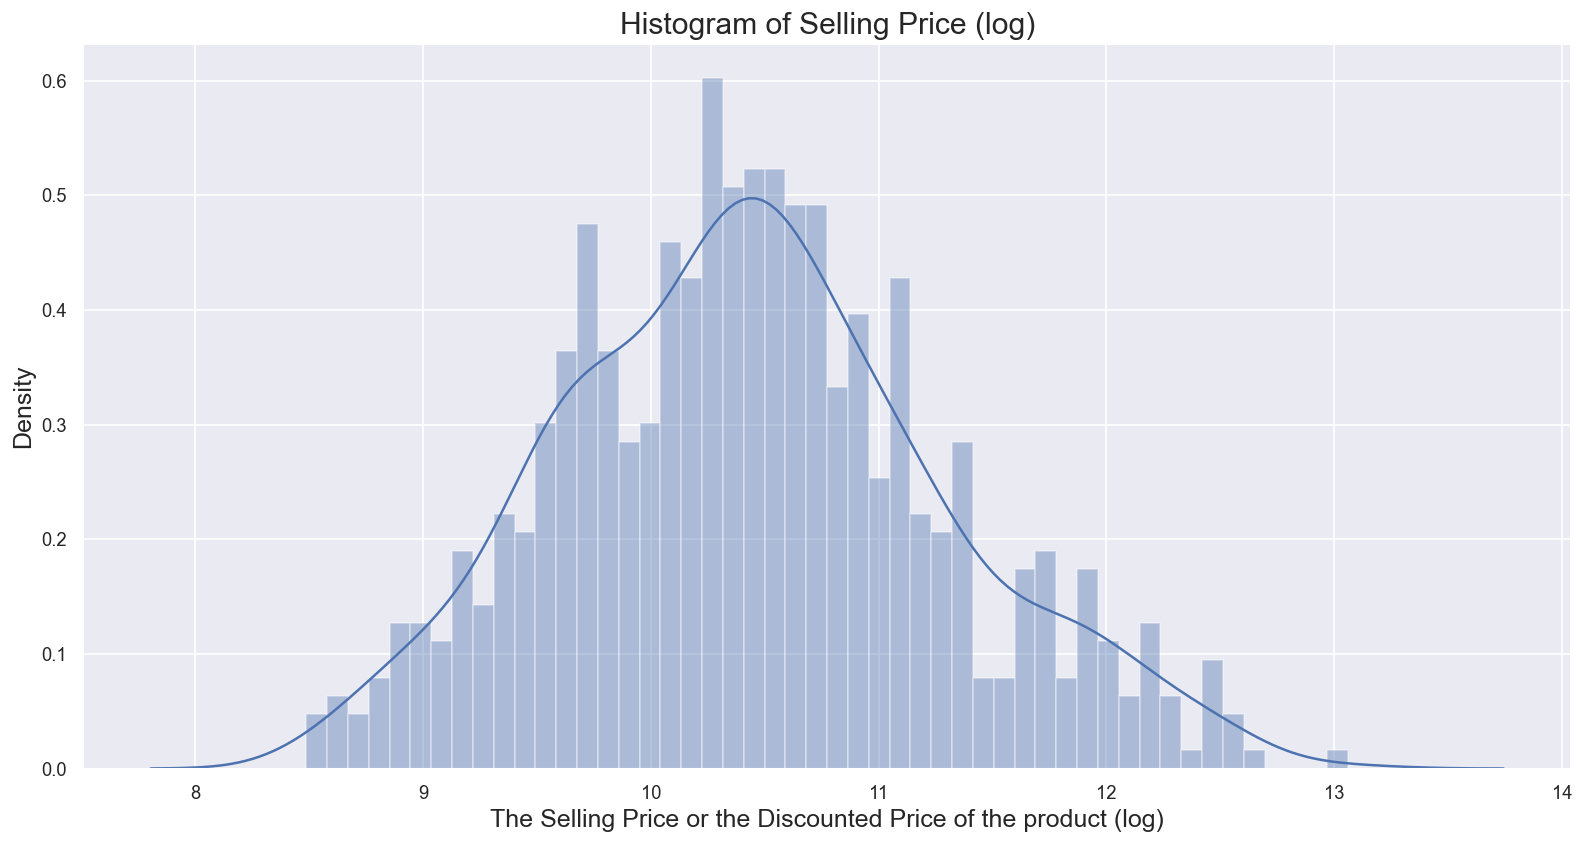

In [55]:
plt.figure(figsize=(16,8), dpi=120)
sns.set() 
ax = sns.distplot(TV_dataset_preprocessing['lg_SP'], bins=50)
plt.title('Histogram of Selling Price (log)', fontsize=18)
plt.xlabel('The Selling Price or the Discounted Price of the product (log)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

After the log() transformation, it looks normal. These transformation should also be adapted in the Original Price, but let's check the relationship between two factors

Text(0.5, 1.0, 'Relations between Selling Price and Original Price')

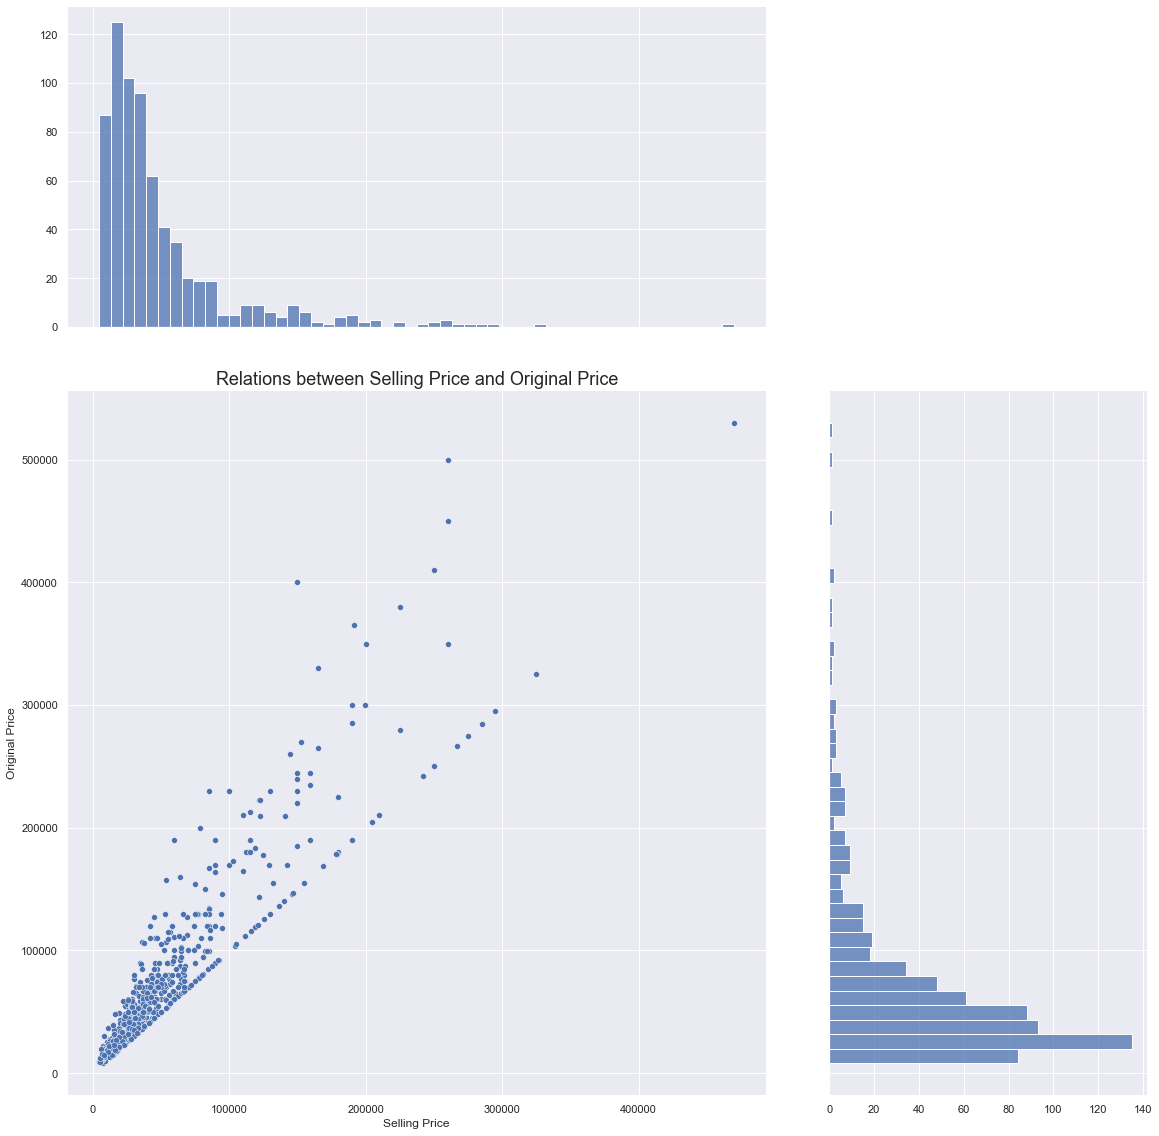

In [56]:
sns.jointplot(data=TV_dataset_preprocessing, x='Selling Price', y='Original Price', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Selling Price and Original Price', fontsize=18)

As is seen, these two factors have severe multicollinearity, consider using methods to lighten multicollinearity, or in worst situations, eliminate the Original Price factor.

<ipython-input-57-35b7d6e2bc2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(TV_dataset_preprocessing['lg_OP'], bins=50)


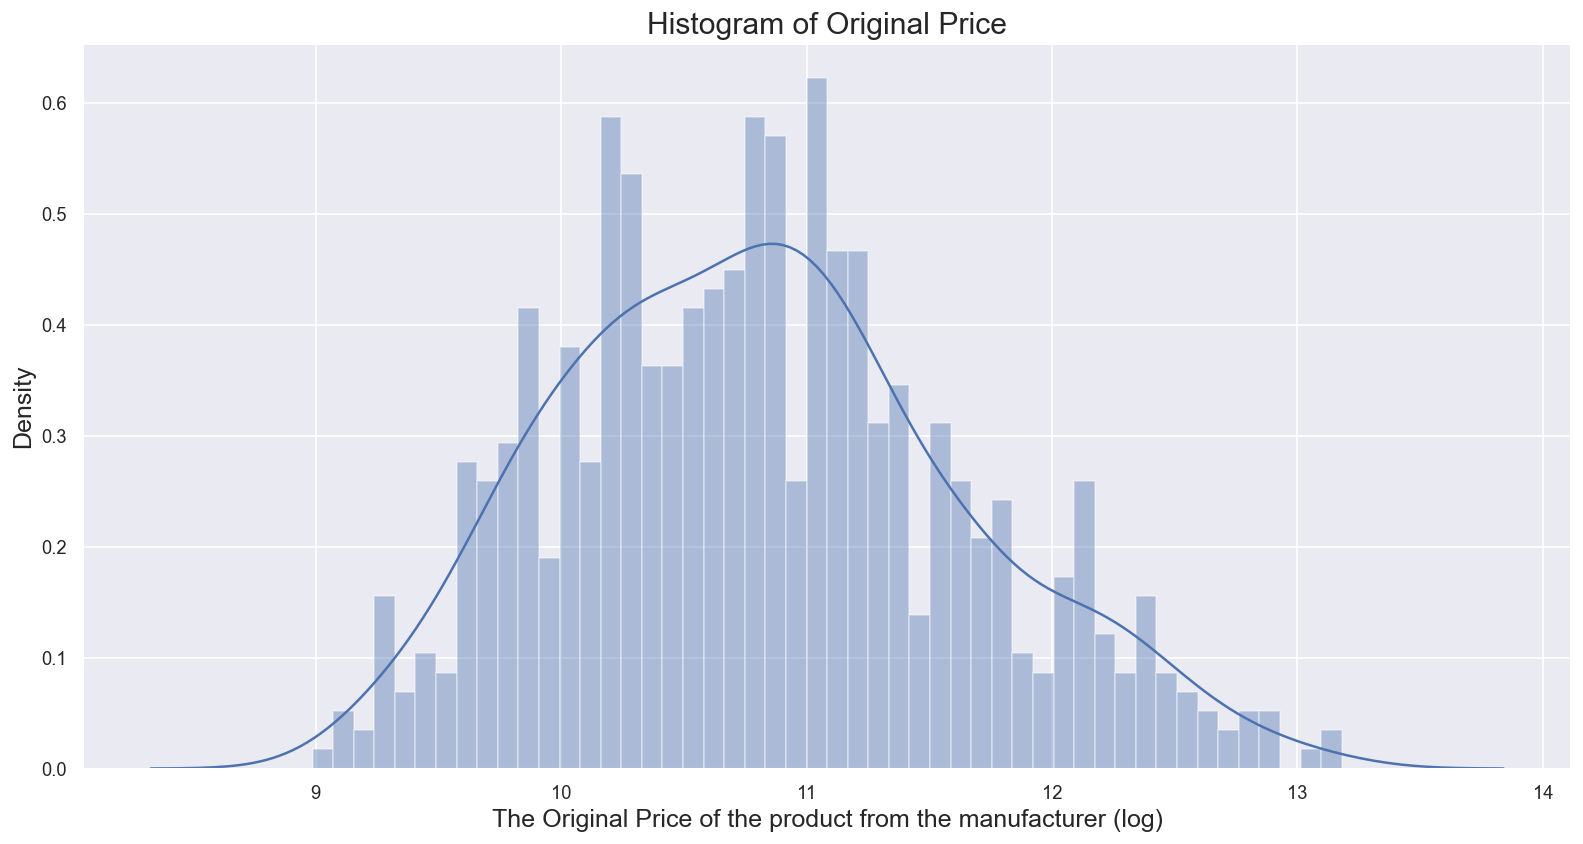

In [57]:
plt.figure(figsize=(16,8), dpi=120)
sns.set() 
ax = sns.distplot(TV_dataset_preprocessing['lg_OP'], bins=50)
plt.title('Histogram of Original Price', fontsize=18)
plt.xlabel('The Original Price of the product from the manufacturer (log)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

Try using some transfomation to lighten multicollinearity, this time the Original Price looks normal to some extent.

Text(0.5, 1.0, 'Relations between Selling Price (log) and Original Price (log)')

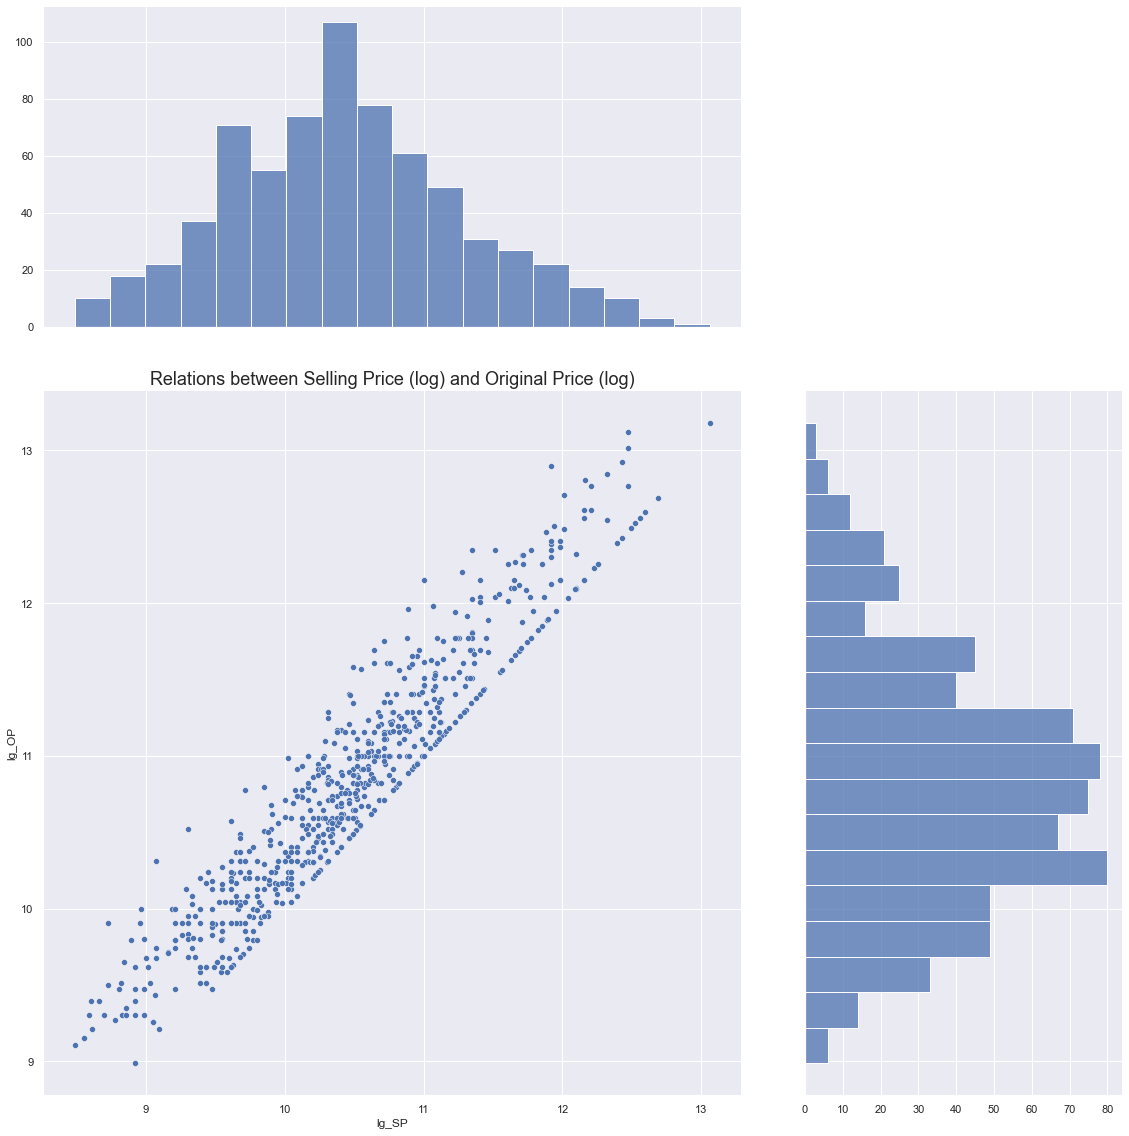

In [59]:
sns.jointplot(data=TV_dataset_preprocessing, x='lg_SP', y='lg_OP', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Selling Price (log) and Original Price (log)', fontsize=18)

There's still multicollinearity, which need to be further studied and manage a way to keep a balance between theory model and the empirical research, like introduce a new variable as the 'Discount Rate', which is (Original Price - Selling Price) / Original Price * 100%

In [64]:
# add Discount Rate if needed
TV_dataset_preprocessing['Discount Rate'] = (TV_dataset_preprocessing['Original Price'] - TV_dataset_preprocessing['Selling Price']) / TV_dataset_preprocessing['Original Price']

In [65]:
# c) from here we provide a simple descriptive statistics
descriptive_statistics = TV_dataset_preprocessing[['Size ', 'Selling Price', 'Original Price', 'Discount Rate', 'Rating']].describe().apply(lambda x: x.round(4))
descriptive_statistics.to_csv('descriptive_statistics.csv')
descriptive_statistics

,Size,Selling Price,Original Price,Discount Rate,Rating
count,690.0000,690.0000,690.0000,690.0000,690.0000
mean,44.7522,49689.0087,70574.9928,0.2875,4.2358
std,11.7419,51737.0348,70610.1956,0.1777,0.3654
min,20.0000,4849.0000,7999.0000,0.0000,2.0000
25%,32.0000,18490.0000,27100.0000,0.1565,4.1000
50%,43.0000,33324.5000,48449.5000,0.3000,4.3000
75%,55.0000,56999.0000,79996.7500,0.4286,4.4000
max,85.0000,469999.0000,529900.0000,0.7106,5.0000


Now we get some basic hints of these quantitative values, for y, it has a mean of 4.2358, combine the former hist plot, it might be an approach to make y normalized to have a standard normal distribution. For different TV size, it has a mean of 44.7522 and with a 11.7419 std. error, it's distribution seems plausible for regression. for Selling Price and Original Price, there means are 49689.0087 and 70574.9928. However, the max is relative high compare with the 75% percentile, which indicate a fat fail or abnormal points, which needs to be concerntrated on. These leads to the Discounr rate at a range of 0% to 71.76%, at a mean of 28.75%. After that, we take a look at the qualitative varieables based on the mean and their frequency statistics.

In [66]:
from scipy.stats import mode
# As is illustrated, the mode of each qualitative variable is [412, 329, 392] for ['Brand', 'Resolution', 'Operating System'], which respectively ['Others', 'Ultra HD LED', 'Android']. Then we take a closer look of each variable.
mode(TV_dataset_preprocessing[['Brand', 'Resolution', 'Operating System']])

ModeResult(mode=array([['Others', 'Ultra HD LED', 'Android']], dtype=object), count=array([[412, 329, 392]]))

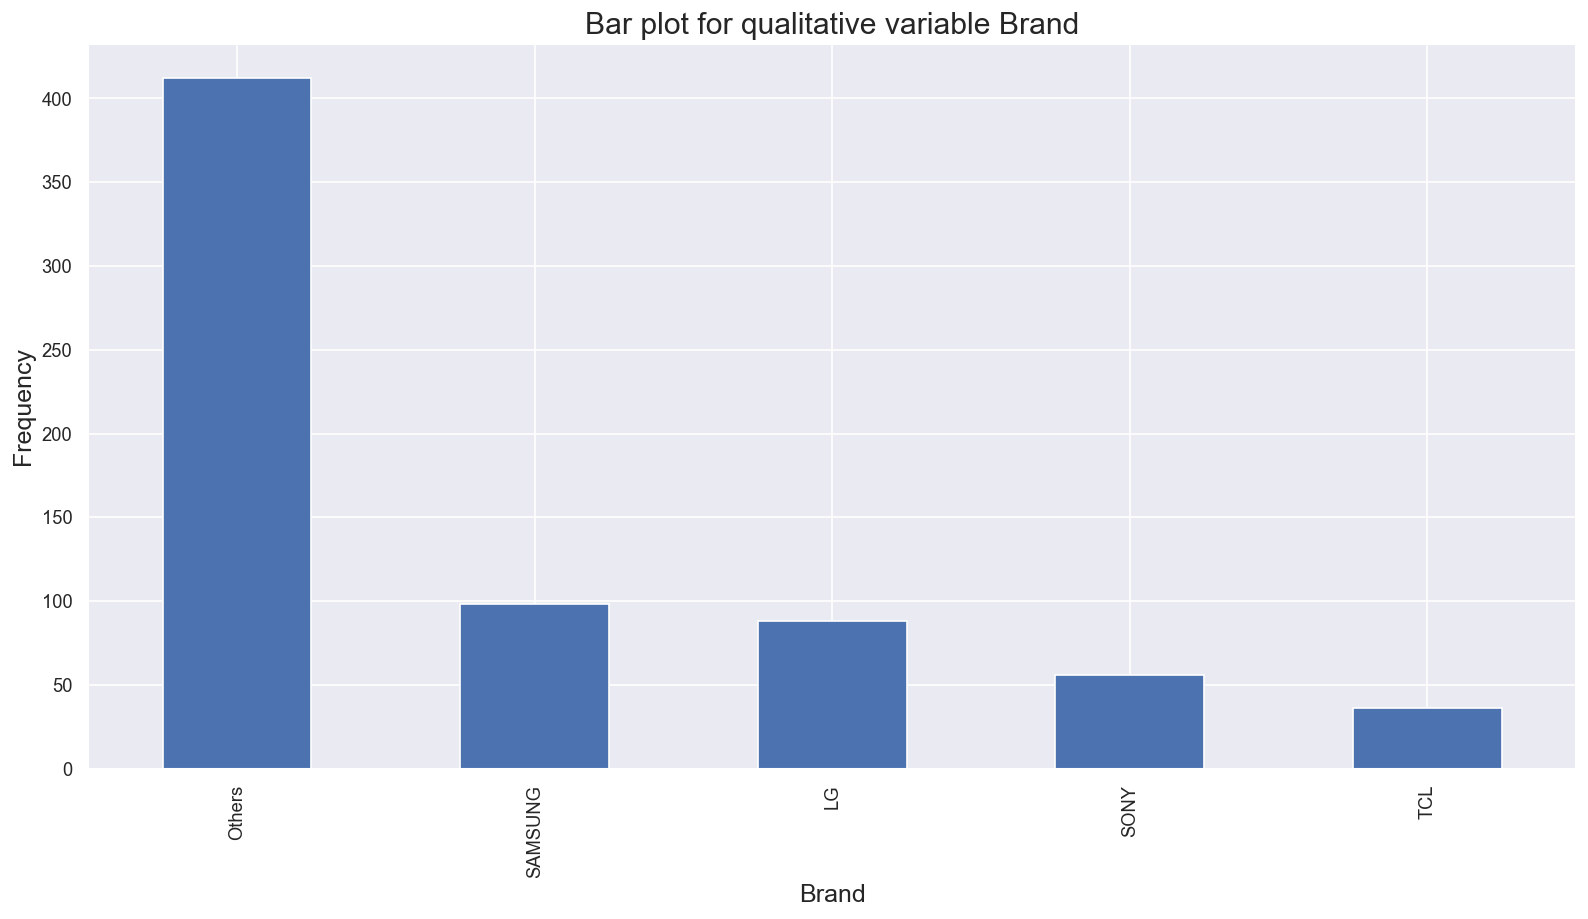

In [67]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing['Brand'].value_counts().plot(kind='bar')
plt.title('Bar plot for qualitative variable Brand', fontsize=18)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

* It seems that Indian e-commerce market are not that oligopolistic in relation to TV. Besides the top 4 brands, there are still many brands from all over the world in the market, which leads to assumptions:
1. The Indian e-commerce TV market is relatively healthy and brands are relativly competitive
2. Consumers don’t pay much attention to brands when they buy TVs

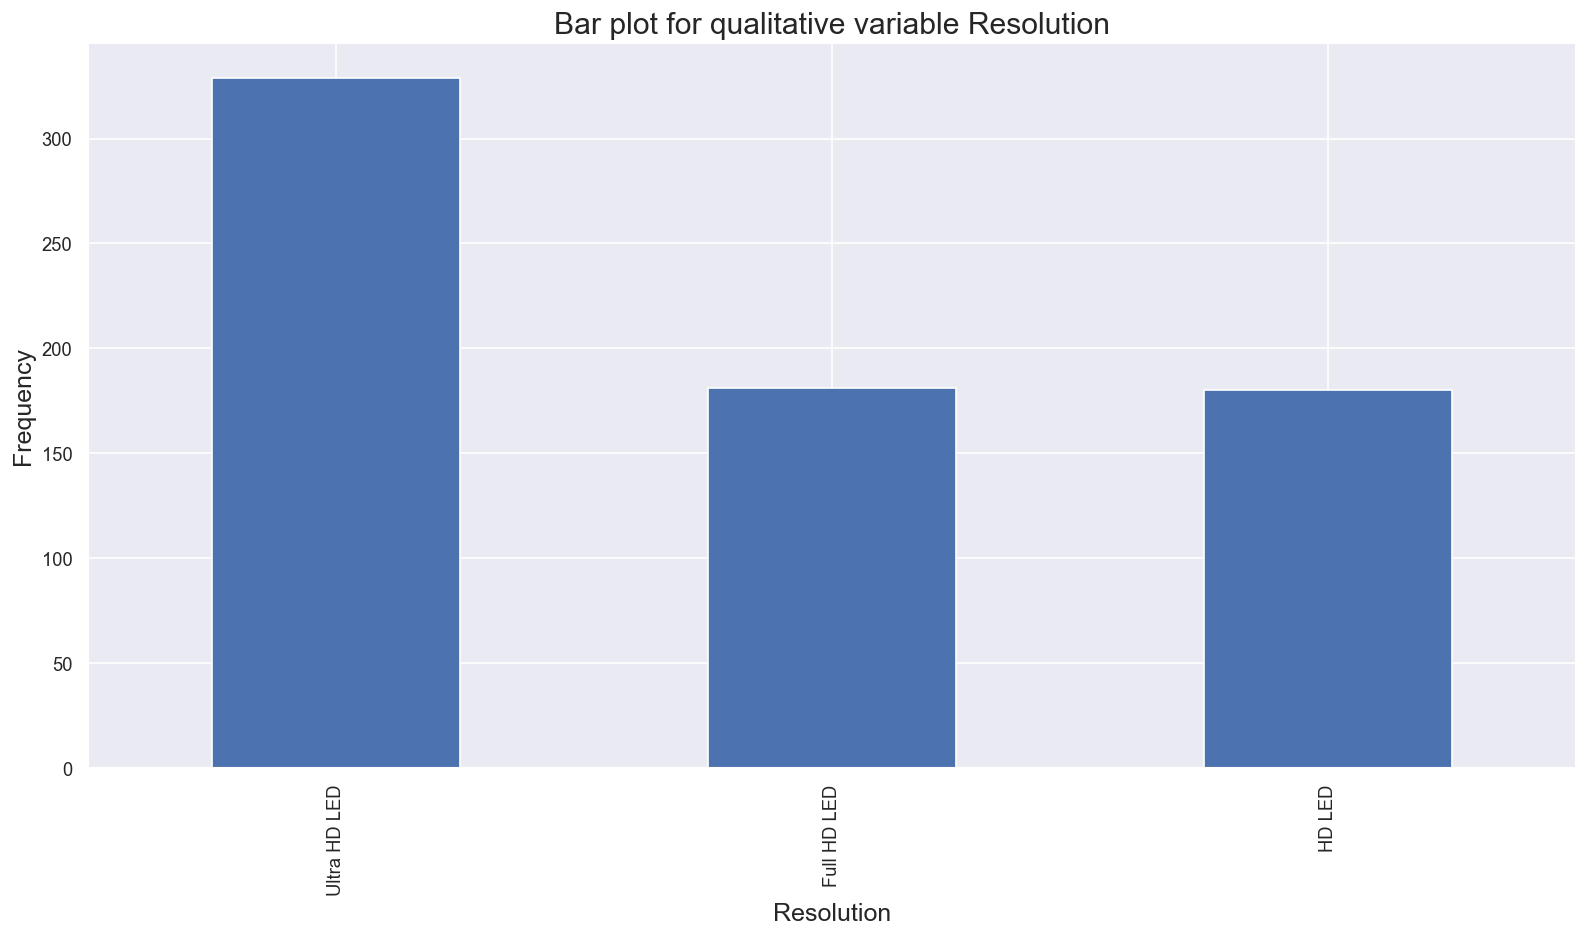

In [68]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing['Resolution'].value_counts().plot(kind='bar')
plt.title('Bar plot for qualitative variable Resolution', fontsize=18)
plt.xlabel('Resolution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

For Resolution, Ultra is the best sellor, but Full HD LED and HD LED also has their shares.

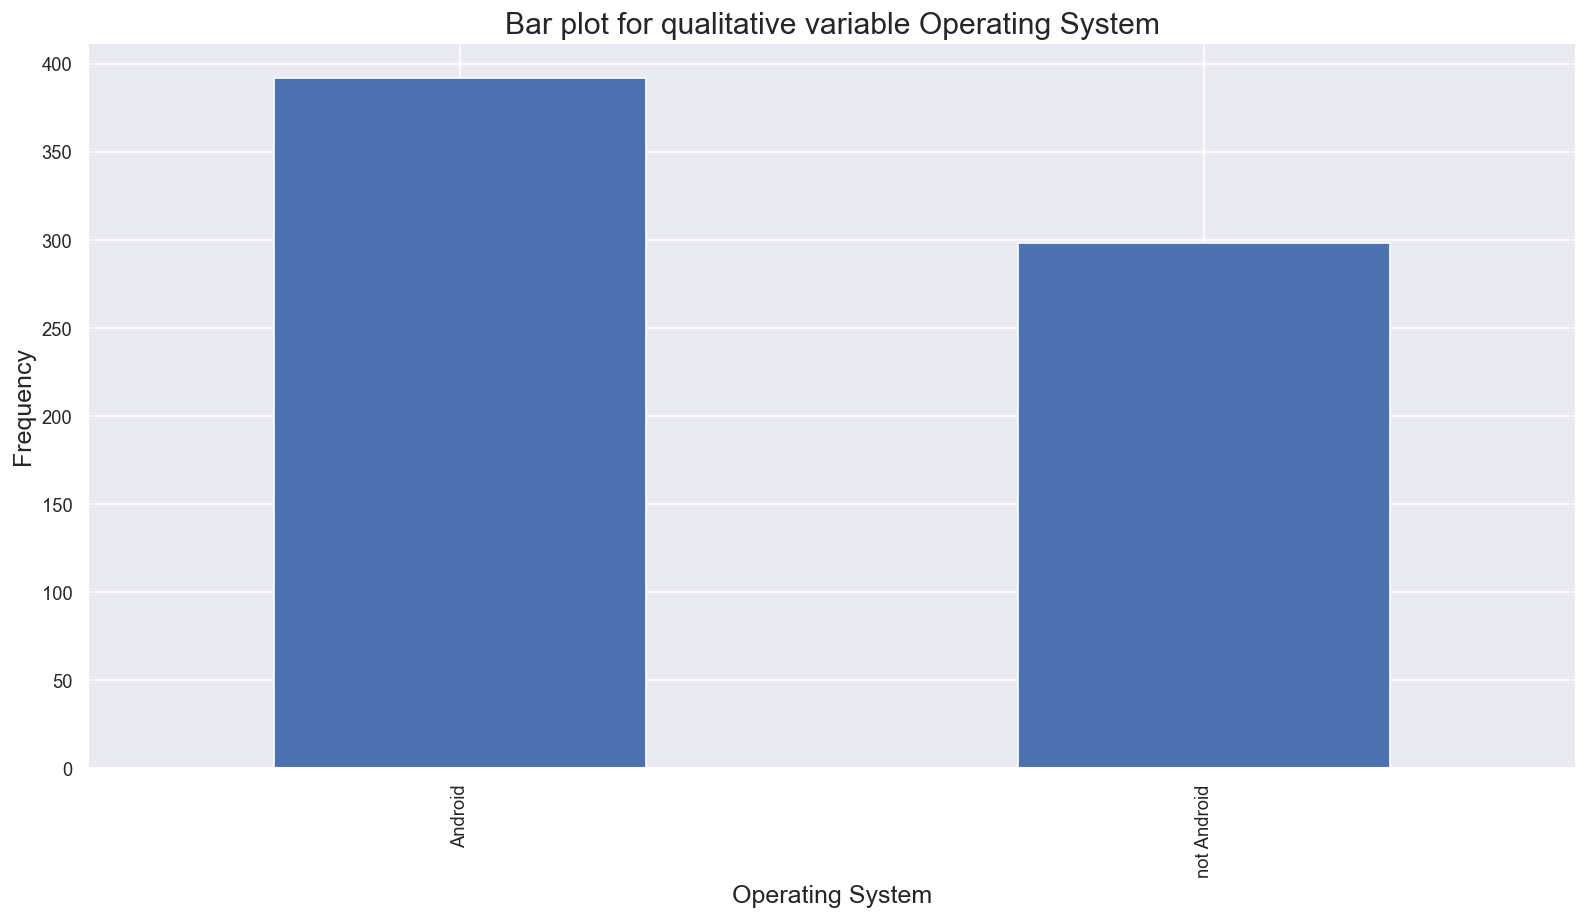

In [69]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing['Operating System'].value_counts().plot(kind='bar')
plt.title('Bar plot for qualitative variable Operating System', fontsize=18)
plt.xlabel('Operating System', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

The market share of Android and not Android is roughly evenly, which indicates the popular of Android OS. So that leads to another hypothesis, whether Android OS has a significant influence on consumers' satisfaction of the TV.

In [49]:
# d) from here we focus on identifying relations between dependent variable and independent ones using scatterplots and correlations

,Size,Rating
Size,1.0000,0.2254
Rating,0.2254,1.0000


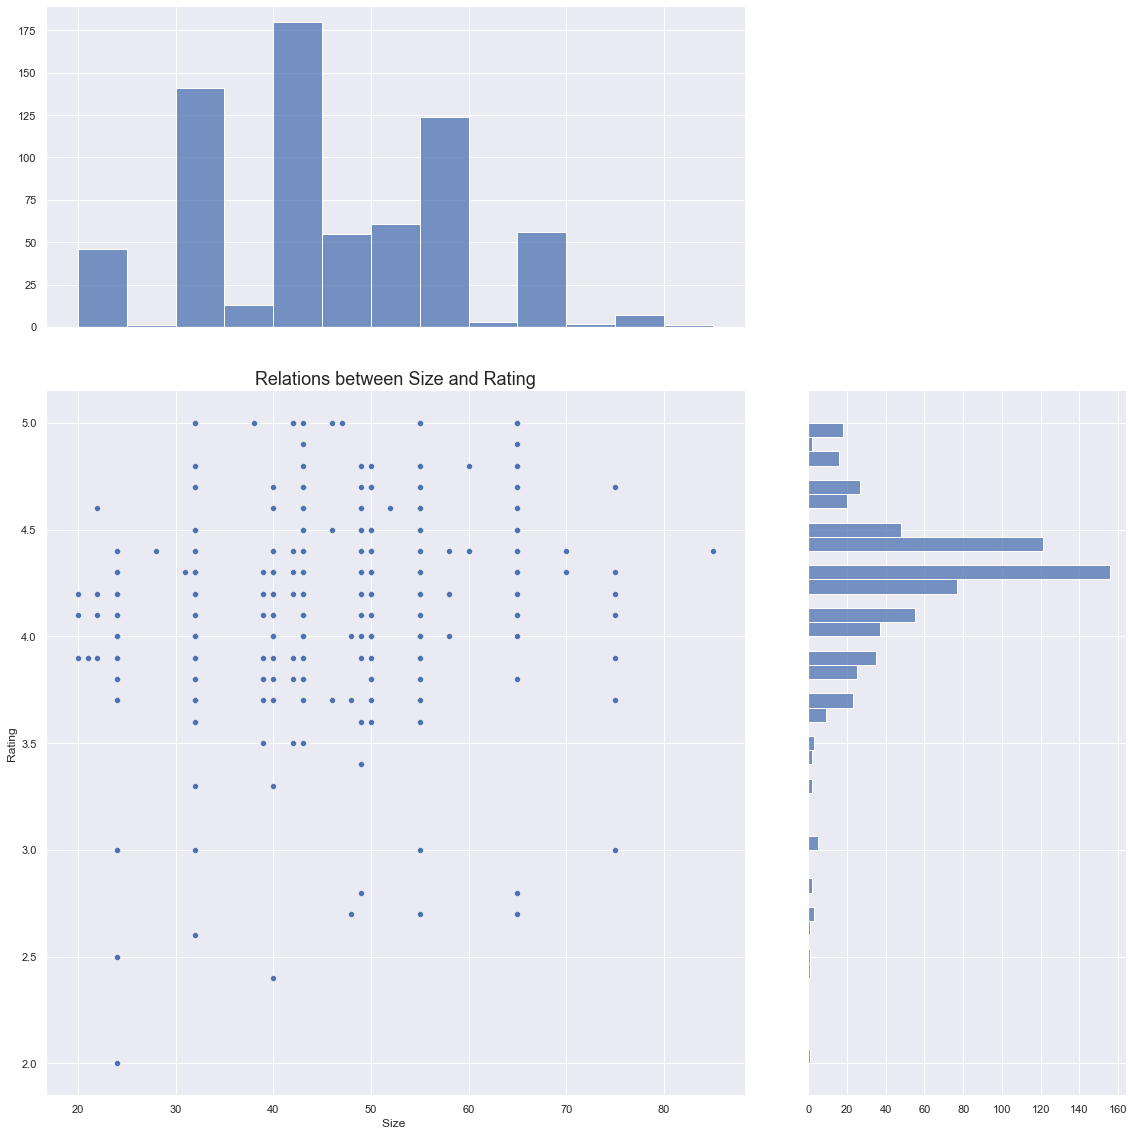

In [70]:
sns.jointplot(data=TV_dataset_preprocessing, x='Size ', y='Rating', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Size and Rating', fontsize=18)
TV_dataset_preprocessing[['Size ', 'Rating']].corr().apply(lambda x: x.round(4))

Because Rating only retains one decimal place, it looks like there is some linear relationship in the scatter plot, but overall the correlation coefficient is okey. the corr between Size and Rating is 0.2254, there's some positive correlation between Size and Rating to some extent, the larger size of a TV is, the greater likely that the rating will be also high.

,lg_SP,Rating
lg_SP,1.0000,0.2591
Rating,0.2591,1.0000


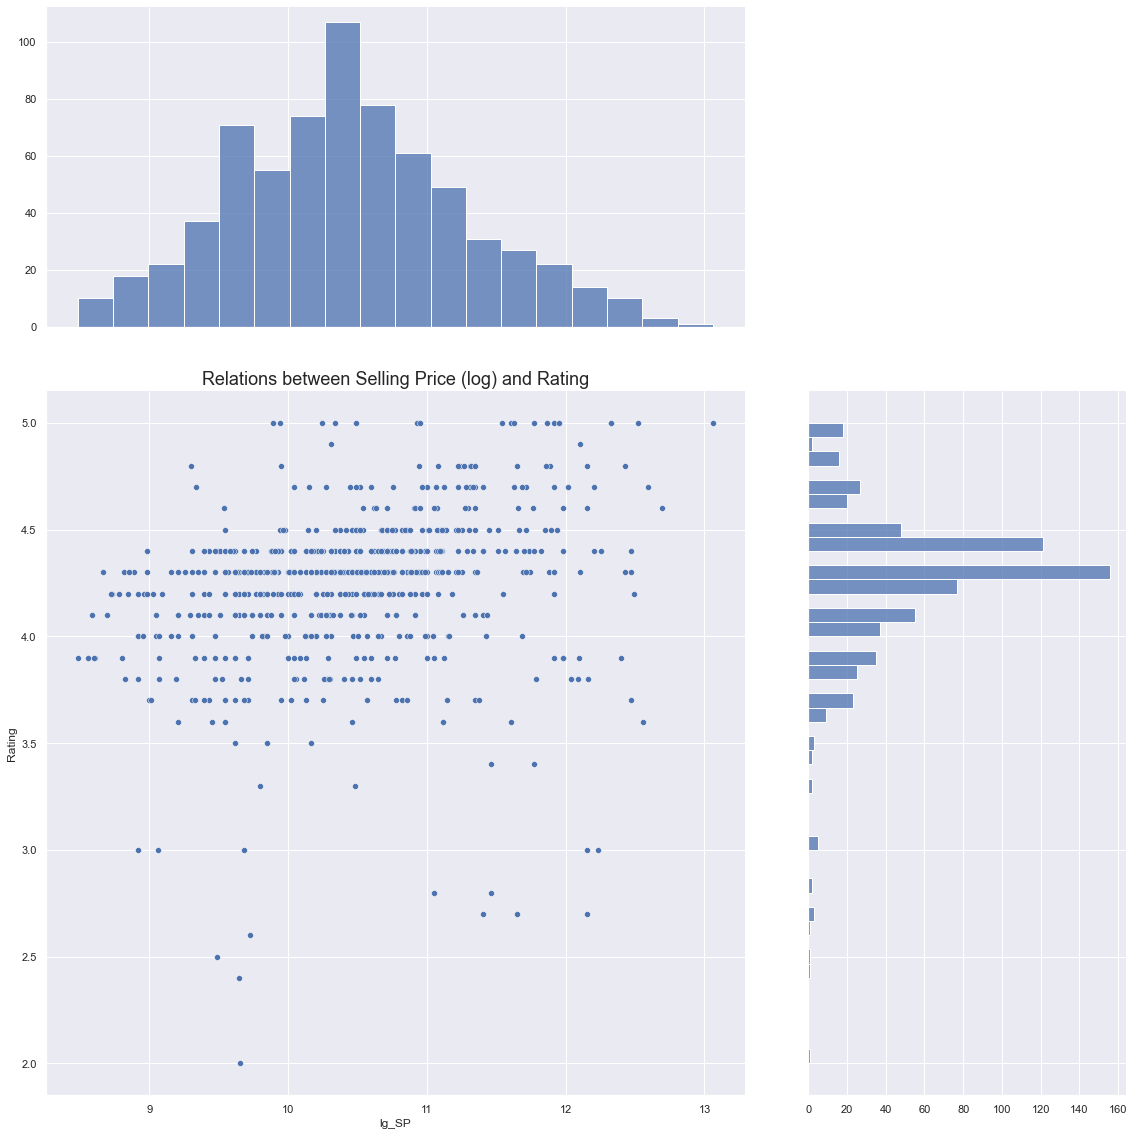

In [71]:
sns.jointplot(data=TV_dataset_preprocessing, x='lg_SP', y='Rating', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Selling Price (log) and Rating', fontsize=18)
TV_dataset_preprocessing[['lg_SP', 'Rating']].corr().apply(lambda x: x.round(4))

After log transfomation, the corr looks relatively scattered. Selling Price (log) also have a positive effect (0.2591) on Rating, but intuitively it is not the higher price consumer bought the better Rating is, it's mo likely that higher price means higher quality of TV, which leads to etter Rating.

,lg_OP,Rating
lg_OP,1.0000,0.2438
Rating,0.2438,1.0000


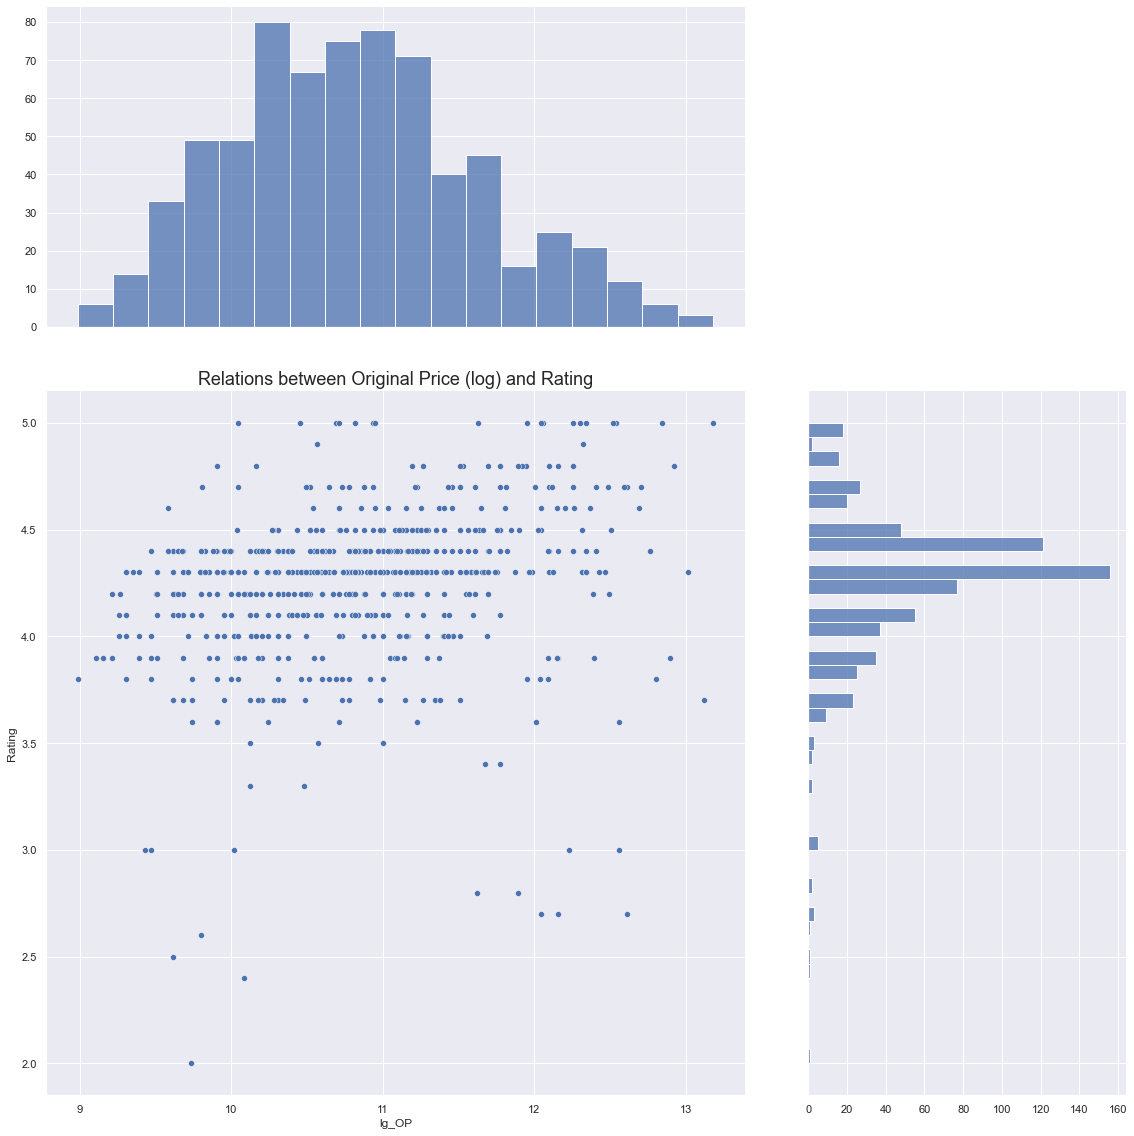

In [72]:
sns.jointplot(data=TV_dataset_preprocessing, x='lg_OP', y='Rating', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Original Price (log) and Rating', fontsize=18)
TV_dataset_preprocessing[['lg_OP', 'Rating']].corr().apply(lambda x: x.round(4))

Likewise, the corr bewteen Original Price (log) and Rating looks relatively scattered. Original Price (log) have a positive effect (0.2438) on Rating, for normal goods, the more discount a good is, it's more likely that the more consumer's utility would increase.

,Discount Rate,Rating
Discount Rate,1.0000,-0.0668
Rating,-0.0668,1.0000


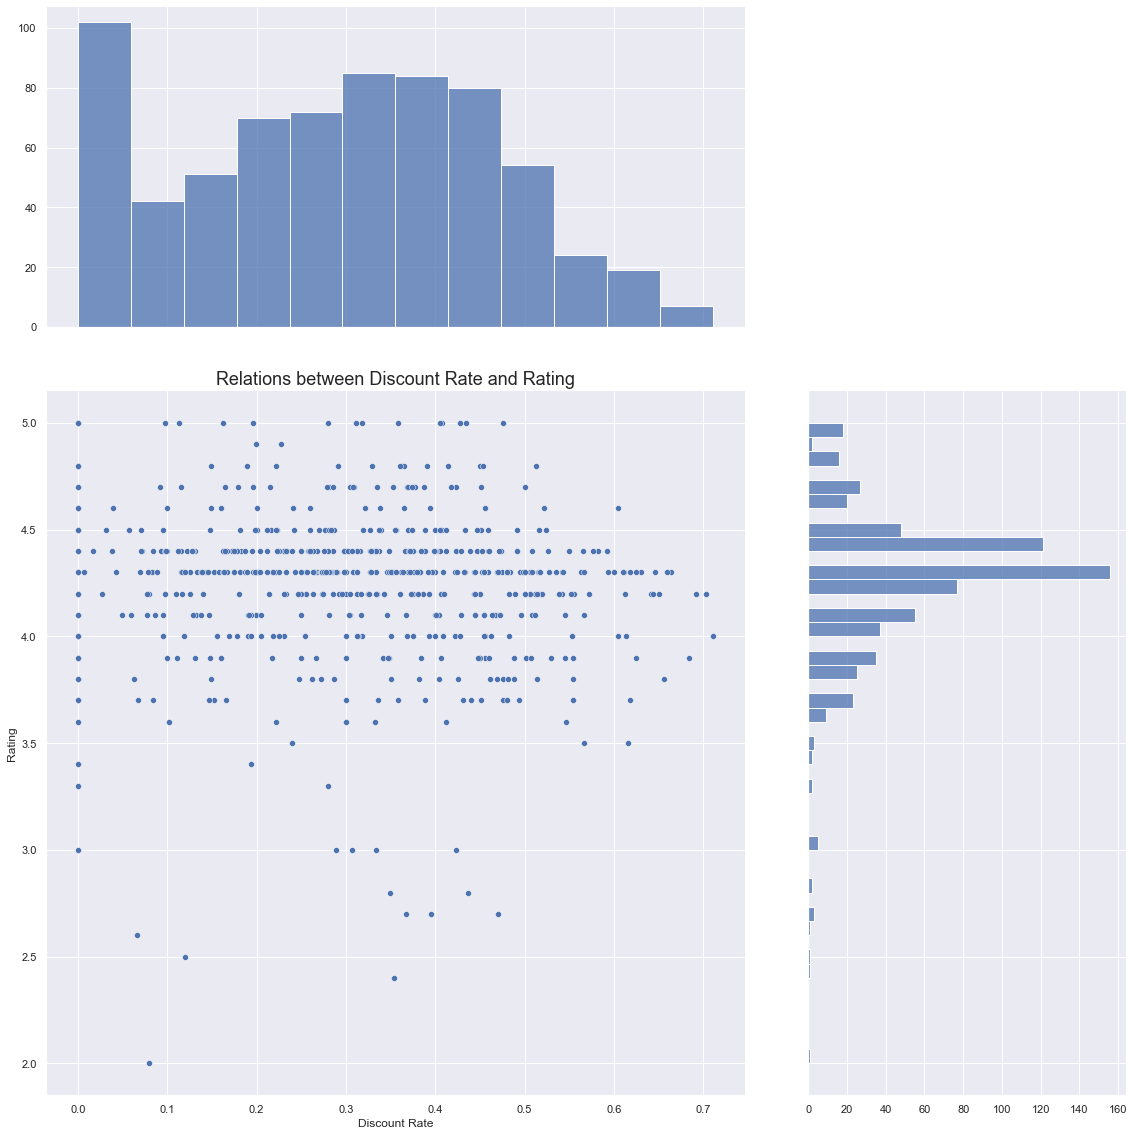

In [73]:
sns.jointplot(data=TV_dataset_preprocessing, x='Discount Rate', y='Rating', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Discount Rate and Rating', fontsize=18)
TV_dataset_preprocessing[['Discount Rate', 'Rating']].corr().apply(lambda x: x.round(4))

It's interesting that Discount Rate has slightly influence on Rating, maybe there're two effects jointly influences. If the Discount Rate is high, then the consumer can get TV in a lower price, which is like income effect to add up to his/ her utility. However, higher Discount Rate also indicates the TV may have some disadvantages or flaws so has to be discounted to sell. In this case will lower the consumer's utility. So the overall effect has joint influence of both effects. Need to be inpluged into the econometric model to check the effect further.

,Brand_Others,Rating
Brand_Others,1.000,-0.193
Rating,-0.193,1.000


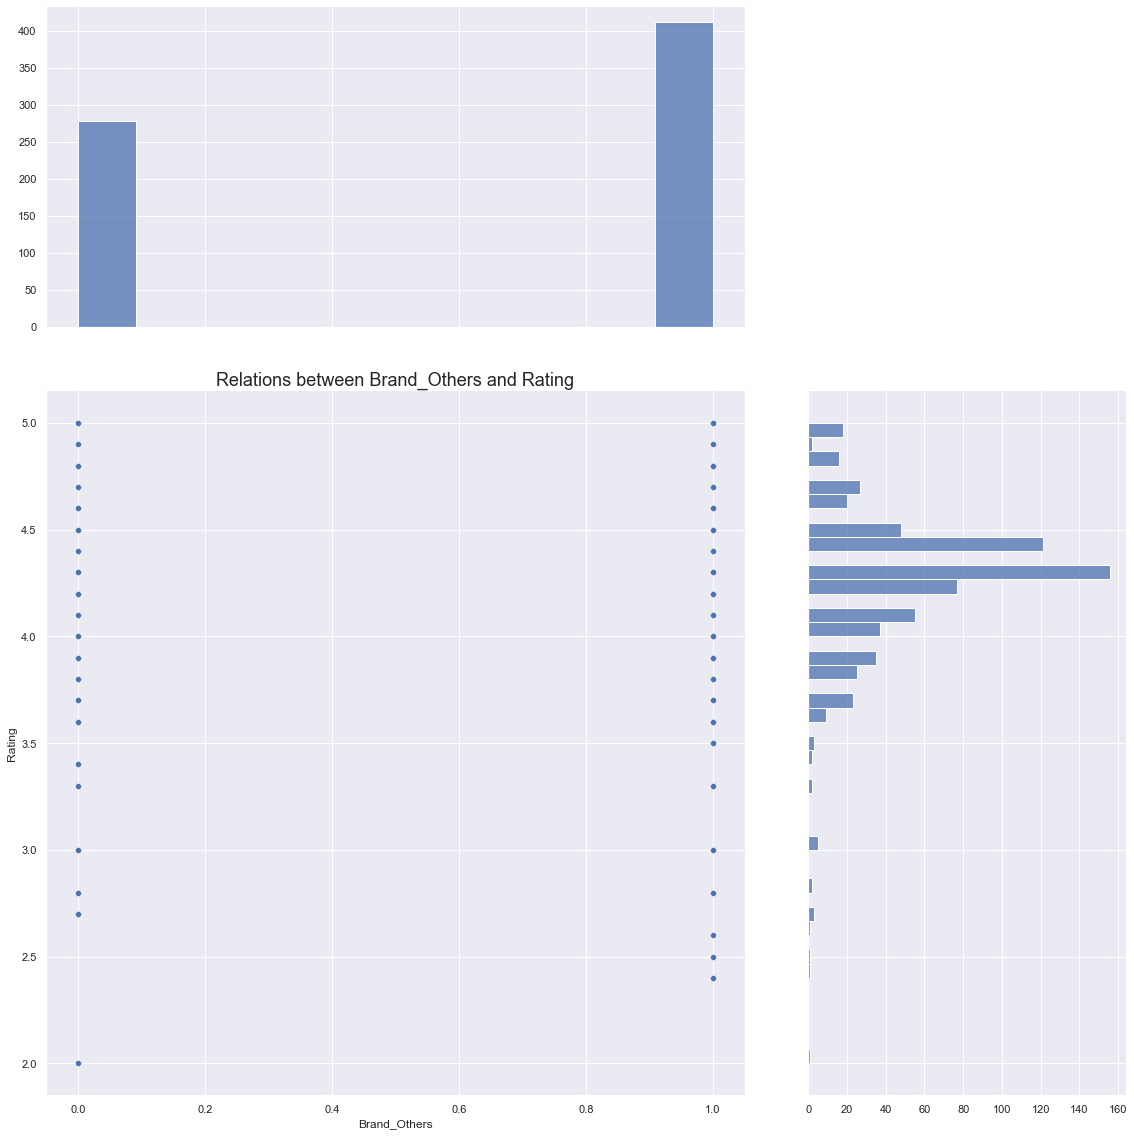

In [74]:
# then lets see the corr in quantitative variables, only check the one with the largest mode
sns.jointplot(data=TV_dataset_preprocessing, x='Brand_Others', y='Rating', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Brand_Others and Rating', fontsize=18)
TV_dataset_preprocessing[['Brand_Others', 'Rating']].corr().apply(lambda x: x.round(4))

Brand other than top famous ones seems to have a negative (0.193) effect on Rating, maybe indicates lower quality or techniques. So top brands may have some positive effect onto the customers.

,Resolution_Ultra HD LED,Rating
Resolution_Ultra HD LED,1.0000,0.1822
Rating,0.1822,1.0000


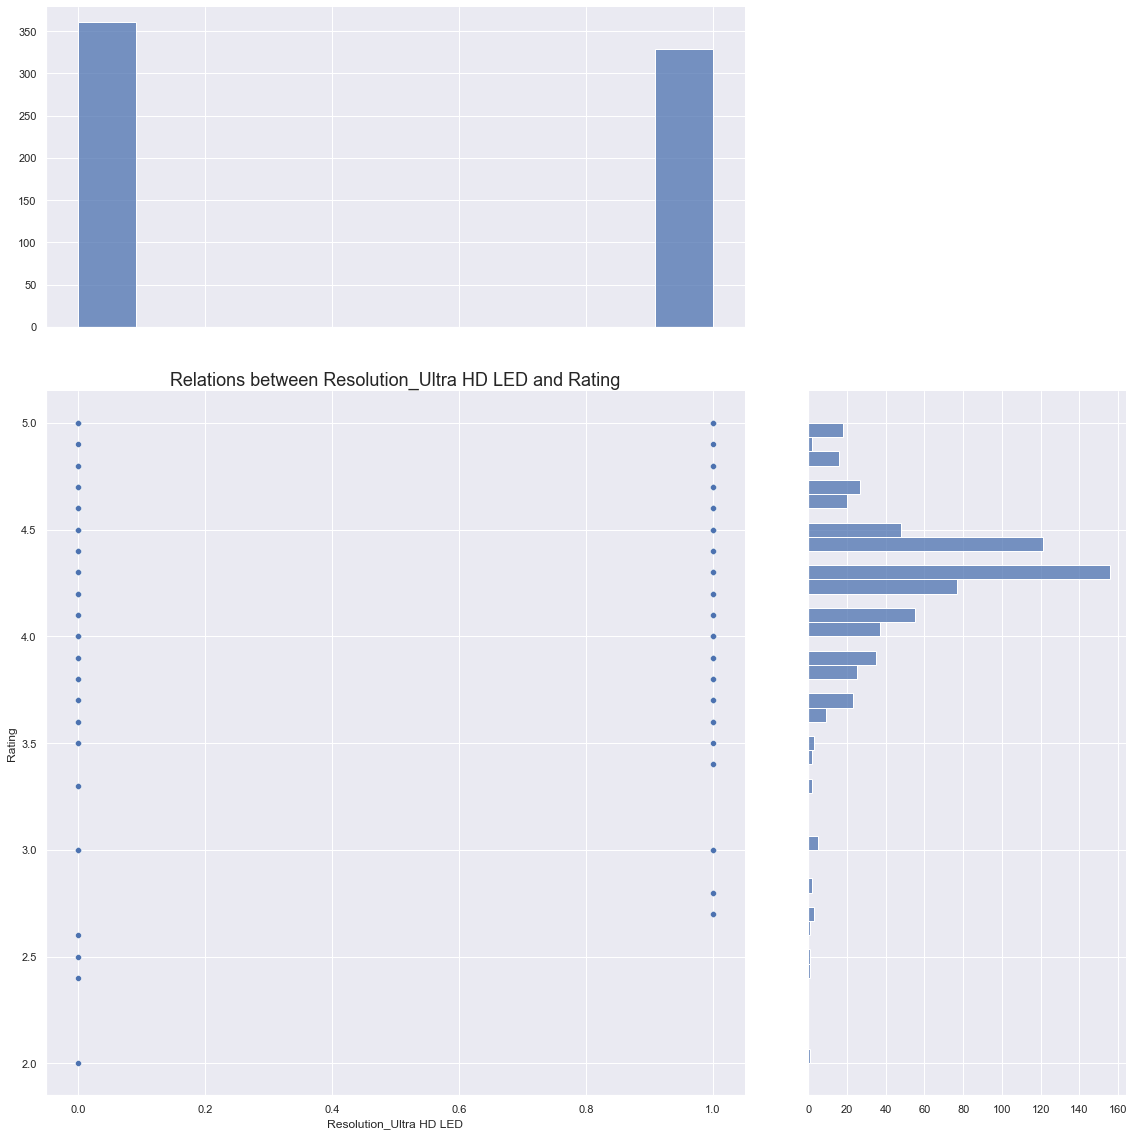

In [75]:
sns.jointplot(data=TV_dataset_preprocessing, x='Resolution_Ultra HD LED', y='Rating', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Resolution_Ultra HD LED and Rating', fontsize=18)
TV_dataset_preprocessing[['Resolution_Ultra HD LED', 'Rating']].corr().apply(lambda x: x.round(4))

Resolution_Ultra HD LED has a positive relationship (corr = 0.1822) with Rating, which is also reasonable, that is, good quality in Resolution may lead to better usage.

,Operating System_Android,Rating
Operating System_Android,1.0000,-0.0812
Rating,-0.0812,1.0000


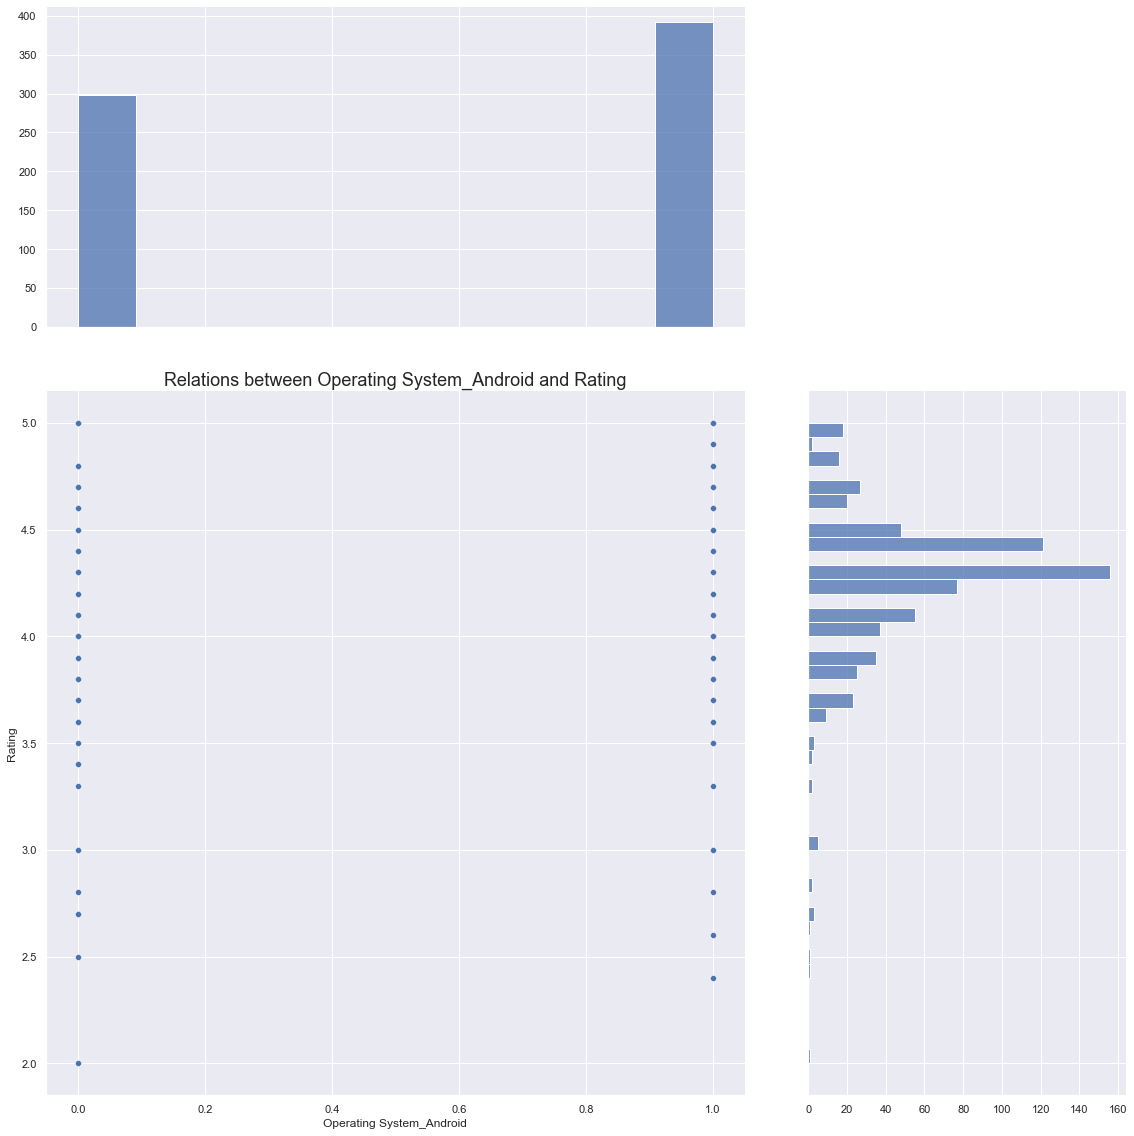

In [76]:
sns.jointplot(data=TV_dataset_preprocessing, x='Operating System_Android', y='Rating', height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between Operating System_Android and Rating', fontsize=18)
TV_dataset_preprocessing[['Operating System_Android', 'Rating']].corr().apply(lambda x: x.round(4))

Seems that OS (Operating System) is not that a critique factor of choosing TV (corr = -0.0812), which matches common sense of picking TVs. For most consumers, the OS is not that important compare with other factors like price or resolution. The OS is more faced with firm's production and provide users with a convenient visual operation interface, makes different OS indifferent for most consumers.

In [ ]:
# e) Describe main features of the variables using box-whisker plots, identify non-typical observations (outliers), exclude them from a sample or keep and briefly explain your decision.

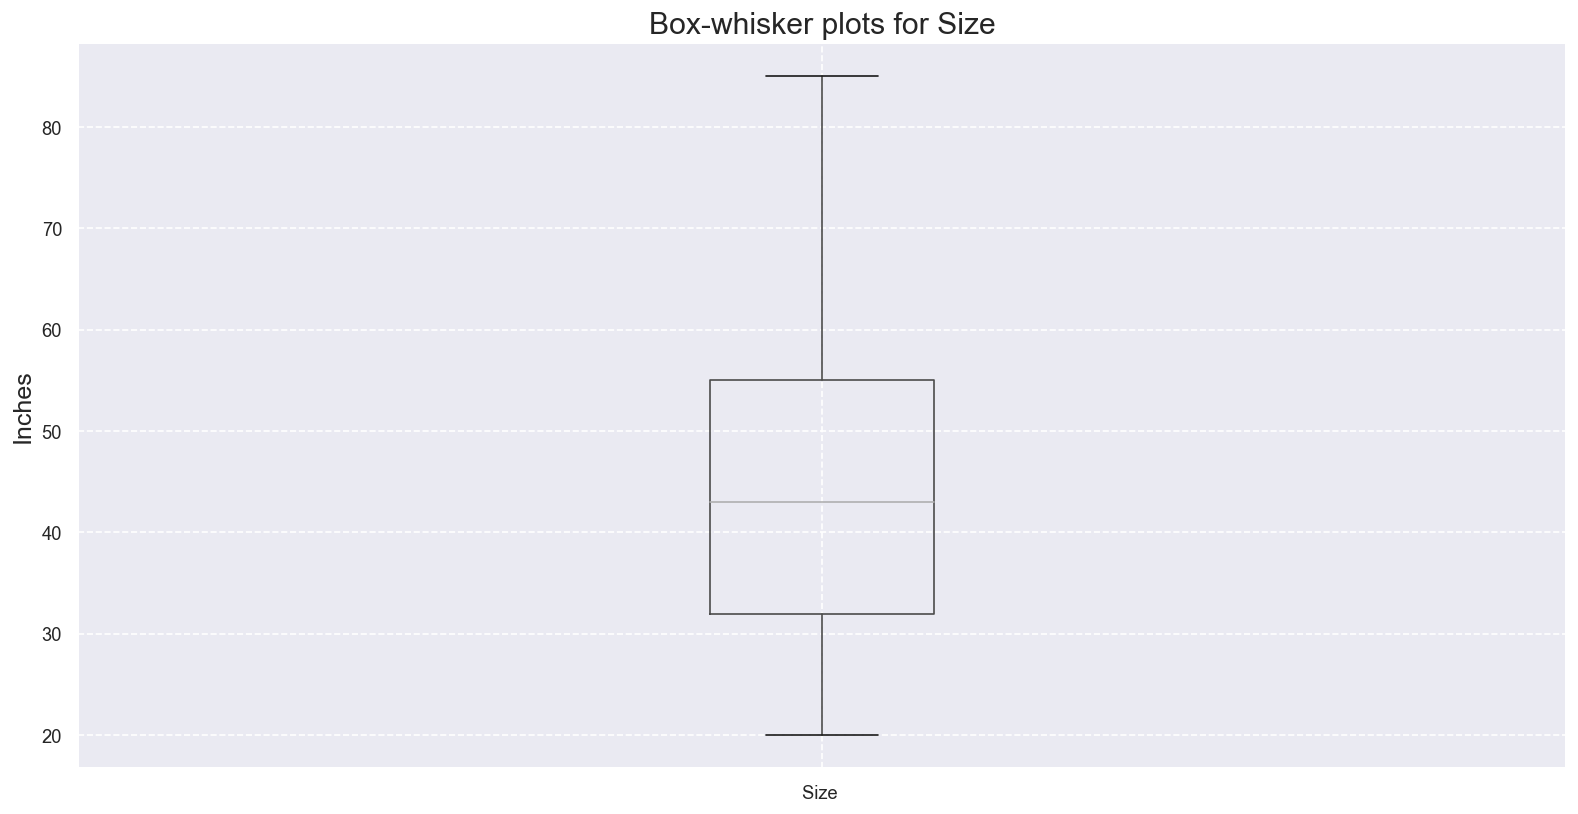

In [77]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing.boxplot(column=['Size '])
plt.grid(linestyle='--')
plt.title('Box-whisker plots for Size', fontsize=18)
plt.ylabel('Inches', fontsize=15)
plt.show()

The box plot for Size looks good, with no abnormal points, but we can still enrich our plot by adding qualitative variable as conditions. One thing should be highlightened that the Operating System has slightly corr of Rating, so the other 2 qualitative variables that are more related should put more emphasizes on.

C:\Users\ytx_q\python3.8\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:220: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)


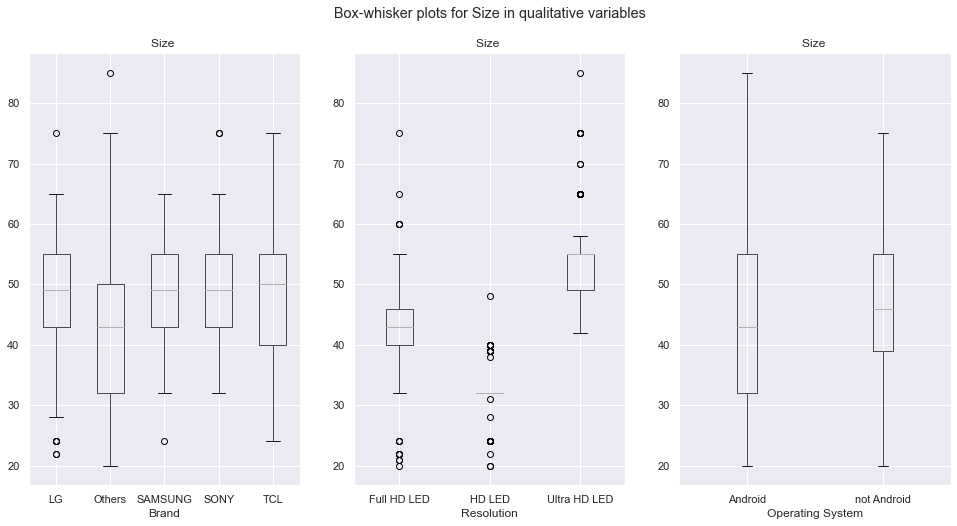

In [78]:
fig, ax =plt.subplots(1, 3, constrained_layout=True, figsize=(16, 8))
axsub = TV_dataset_preprocessing.boxplot(column=['Size '], ax=ax[0], by='Brand')
axsub = TV_dataset_preprocessing.boxplot(column=['Size '], ax=ax[1], by='Resolution')
axsub = TV_dataset_preprocessing.boxplot(column=['Size '], ax=ax[2], by='Operating System')
fig.suptitle('Box-whisker plots for Size in qualitative variables')
plt.show()

For qualitative variable Brand and Operating System, eyerything looks relatively fine, compare to Resolution. For outliers in Brand, basically there're somewhere less than 100 inches, which is reasonable. For outliers in OS, there's none. For Resolution, more outliers can be seen under HD LED condition, maybe it's because the mean and quantile are too close, and basically the Size data is no need to be punned consider the realistic and the its distribution.

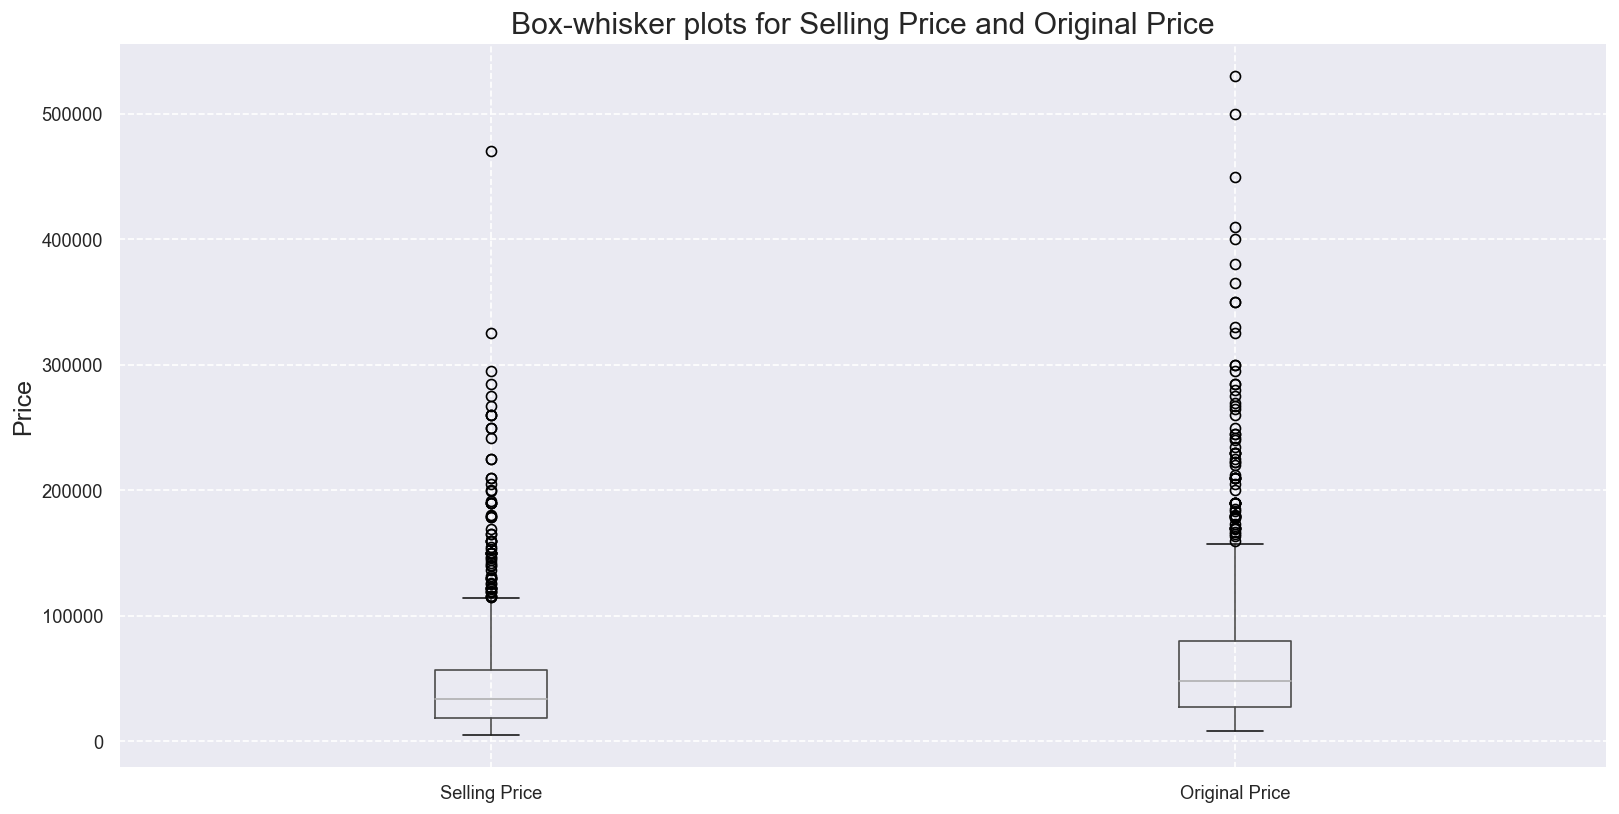

In [79]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing.boxplot(column=['Selling Price', 'Original Price'])
plt.grid(linestyle='--')
plt.title('Box-whisker plots for Selling Price and Original Price', fontsize=18)
plt.ylabel('Price', fontsize=15)
plt.show()

Take a look at the Selling Price and Original Price, it can be predicted that there're more outliers, and from the above we've already known the advantages of log taransformation, let's see if it still holds.

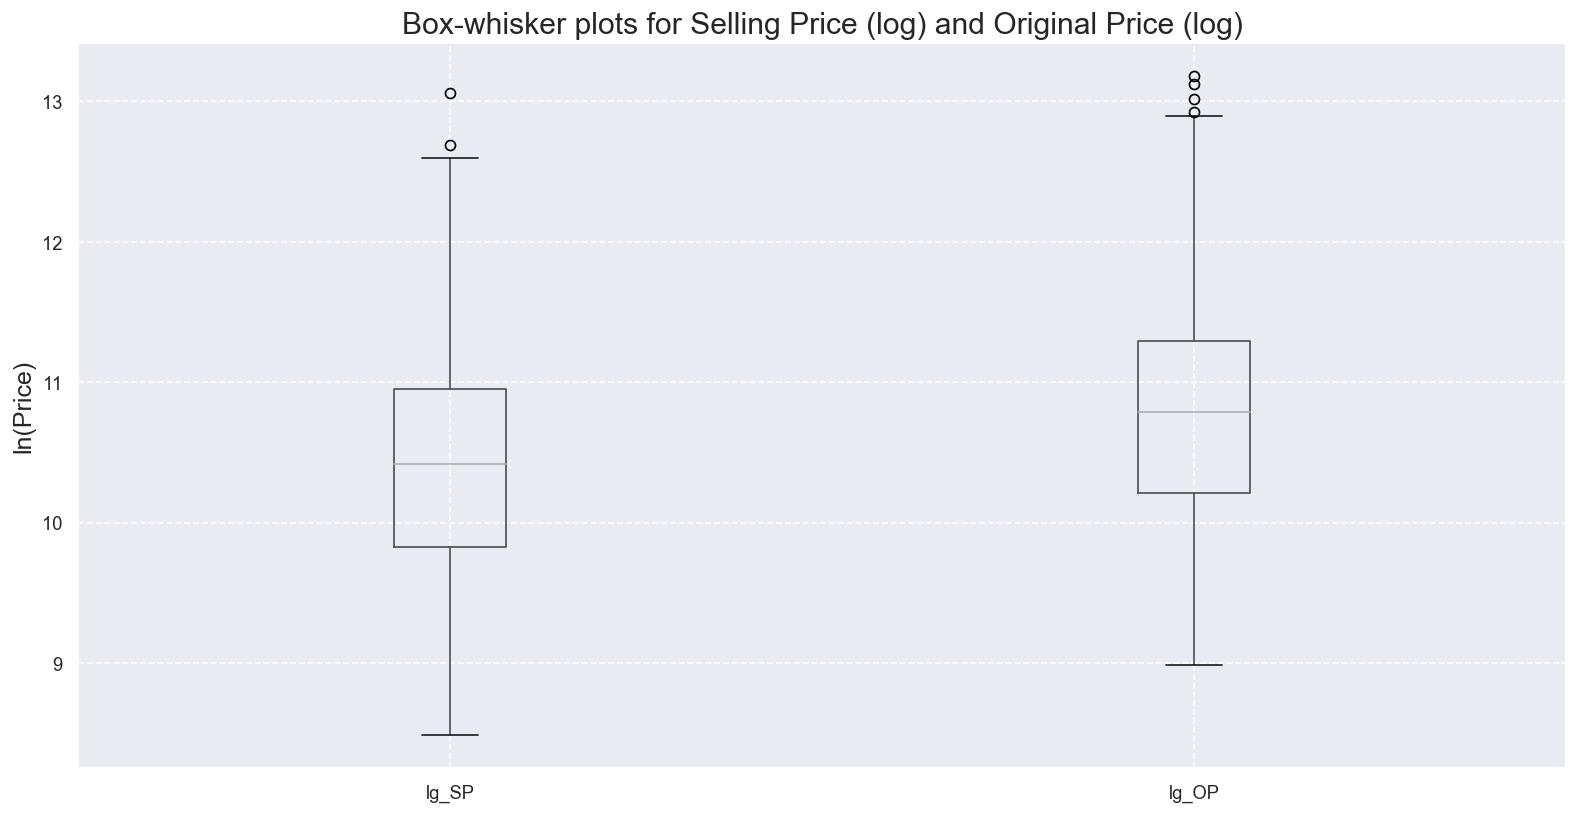

In [80]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing.boxplot(column=['lg_SP', 'lg_OP'])
plt.grid(linestyle='--')
plt.title('Box-whisker plots for Selling Price (log) and Original Price (log)', fontsize=18)
plt.ylabel('ln(Price)', fontsize=15)
plt.show()

Which looks so much better, as the distribution of both variables are somewhat normal, it's reasonable that the log transfomation leads to a better approach. And this also indicates again in the future regression model that we can focus on the percentage change of both prices rather than the value change. Then we work on prices separately that to eliminate the possible outliers.

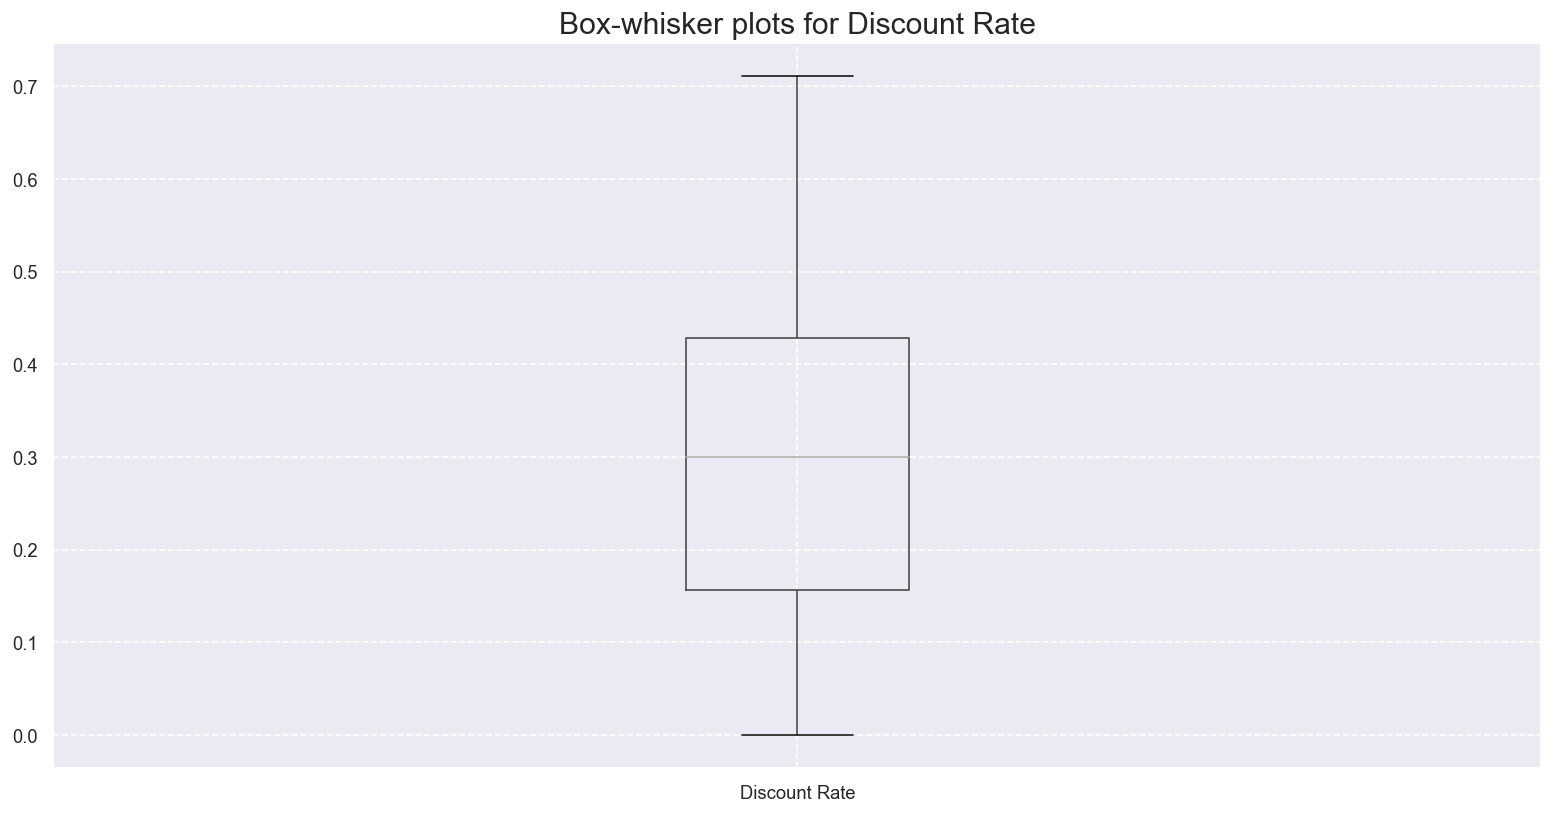

In [81]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing.boxplot(column=['Discount Rate'])
plt.grid(linestyle='--')
plt.title('Box-whisker plots for Discount Rate', fontsize=18)
plt.show()

which looks good

C:\Users\ytx_q\python3.8\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:220: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)


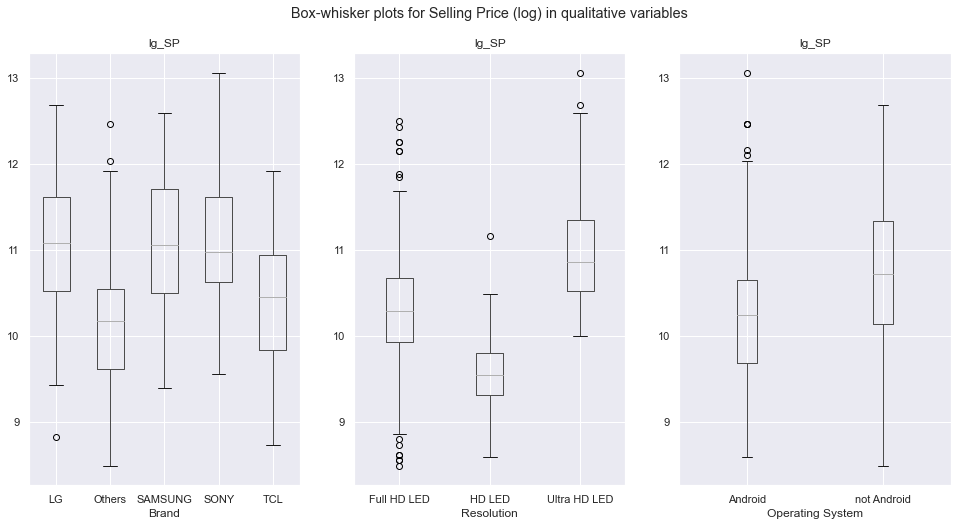

In [82]:
fig, ax =plt.subplots(1, 3, constrained_layout=True, figsize=(16, 8))
axsub = TV_dataset_preprocessing.boxplot(column=['lg_SP'], ax=ax[0], by='Brand')
axsub = TV_dataset_preprocessing.boxplot(column=['lg_SP'], ax=ax[1], by='Resolution')
axsub = TV_dataset_preprocessing.boxplot(column=['lg_SP'], ax=ax[2], by='Operating System')
fig.suptitle('Box-whisker plots for Selling Price (log) in qualitative variables')
plt.show()

First is for the Selling Price (log), we can see that most outliers are extraordinarily expensive, and few on LG in Brand and Full HD LED in Resolution that have smaller values. Basically we need to check whether the Selling Price is mispriced.

In [83]:
Ab_dataset = TV_dataset_preprocessing.copy() # make a copy just in case

In [84]:
Ab_SP = Ab_dataset[['Selling Price','Brand', 'Resolution', 'Rating']]

In [85]:
# for the lowest prices everything looks reasonable, the brand is not top sellers, Resolution is not the best, and the rating is not good. so no eliminations
Ab_SP.sort_values('Selling Price')[:5]

,Selling Price,Brand,Resolution,Rating
858,4849,Others,Full HD LED,3.9
614,5200,Others,Full HD LED,3.9
859,5200,Others,Full HD LED,3.9
826,5364,Others,HD LED,4.1
860,5459,Others,Full HD LED,3.9


In [86]:
# choose more abservations because there's more outliers in highest prices. Can see there's one significantly expensive point. Despite the Brand. Recolution, Rating are all reasonable, this point is way much outlierer than the rest, maybe is a suberTV by SONY. For obs. 368 there's a very low Rating, maybe because the consumer think it's not worth the price, or in other words, this TV is mispriced, the same heappens in 230.
Ab_SP.sort_values('Selling Price',ascending=False)[:10]

,Selling Price,Brand,Resolution,Rating
228,469999,SONY,Ultra HD LED,5.0
331,324990,LG,Ultra HD LED,4.6
253,294900,SAMSUNG,Ultra HD LED,4.7
368,284900,SAMSUNG,Ultra HD LED,3.6
330,274900,SAMSUNG,Ultra HD LED,5.0
681,267000,SAMSUNG,Full HD LED,4.2
258,259999,SONY,Ultra HD LED,4.3
230,259999,SONY,Ultra HD LED,3.7
358,259999,Others,Ultra HD LED,4.4
231,249999,LG,Ultra HD LED,4.8


In [87]:
# in such case we eliminate 2 outliers
TV_dataset_preprocessing = TV_dataset_preprocessing.drop(TV_dataset_preprocessing[TV_dataset_preprocessing['Selling Price'] == 469999].index)
TV_dataset_preprocessing = TV_dataset_preprocessing.drop(TV_dataset_preprocessing[(TV_dataset_preprocessing['Selling Price'] == 259999) & (TV_dataset_preprocessing['Rating'] == 3.7)].index)

C:\Users\ytx_q\python3.8\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:220: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)


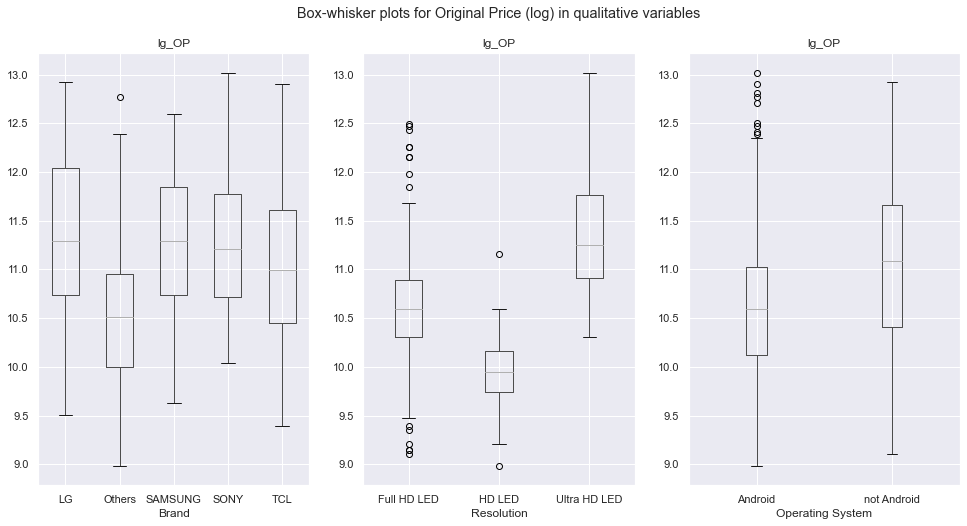

In [88]:
# then lets check the Original Price
fig, ax =plt.subplots(1, 3, constrained_layout=True, figsize=(16, 8))
axsub = TV_dataset_preprocessing.boxplot(column=['lg_OP'], ax=ax[0], by='Brand')
axsub = TV_dataset_preprocessing.boxplot(column=['lg_OP'], ax=ax[1], by='Resolution')
axsub = TV_dataset_preprocessing.boxplot(column=['lg_OP'], ax=ax[2], by='Operating System')
fig.suptitle('Box-whisker plots for Original Price (log) in qualitative variables')
plt.show()

The alike situations happens again, so the process should be alike.

In [89]:
Ab_OP = Ab_dataset[['Original Price','Brand', 'Resolution', 'Rating']]


In [90]:
# from here it looks fine, no eliminations
Ab_OP.sort_values('Original Price')[:5]

,Original Price,Brand,Resolution,Rating
559,7999,Others,HD LED,3.8
858,8990,Others,Full HD LED,3.9
859,9420,Others,Full HD LED,3.9
614,9420,Others,Full HD LED,3.9
630,9990,Others,Full HD LED,3.9


In [91]:
Ab_OP.sort_values('Original Price',ascending=False)[:10]

,Original Price,Brand,Resolution,Rating
228,529900,SONY,Ultra HD LED,5.0
230,499900,SONY,Ultra HD LED,3.7
258,449900,SONY,Ultra HD LED,4.3
231,409990,LG,Ultra HD LED,4.8
581,399990,TCL,Ultra HD LED,3.9
245,379990,LG,Ultra HD LED,5.0
476,364900,SONY,Ultra HD LED,3.8
358,350000,Others,Ultra HD LED,4.4
206,349990,LG,Ultra HD LED,4.4
301,329900,SONY,Ultra HD LED,4.7


In [92]:
TV_dataset_preprocessing = TV_dataset_preprocessing.drop(TV_dataset_preprocessing[TV_dataset_preprocessing['Original Price'] >= 449900].index)
TV_dataset_preprocessing = TV_dataset_preprocessing.drop(TV_dataset_preprocessing[(TV_dataset_preprocessing['Original Price'] >= 300000) & (TV_dataset_preprocessing['Rating'] <= 3.8)].index)

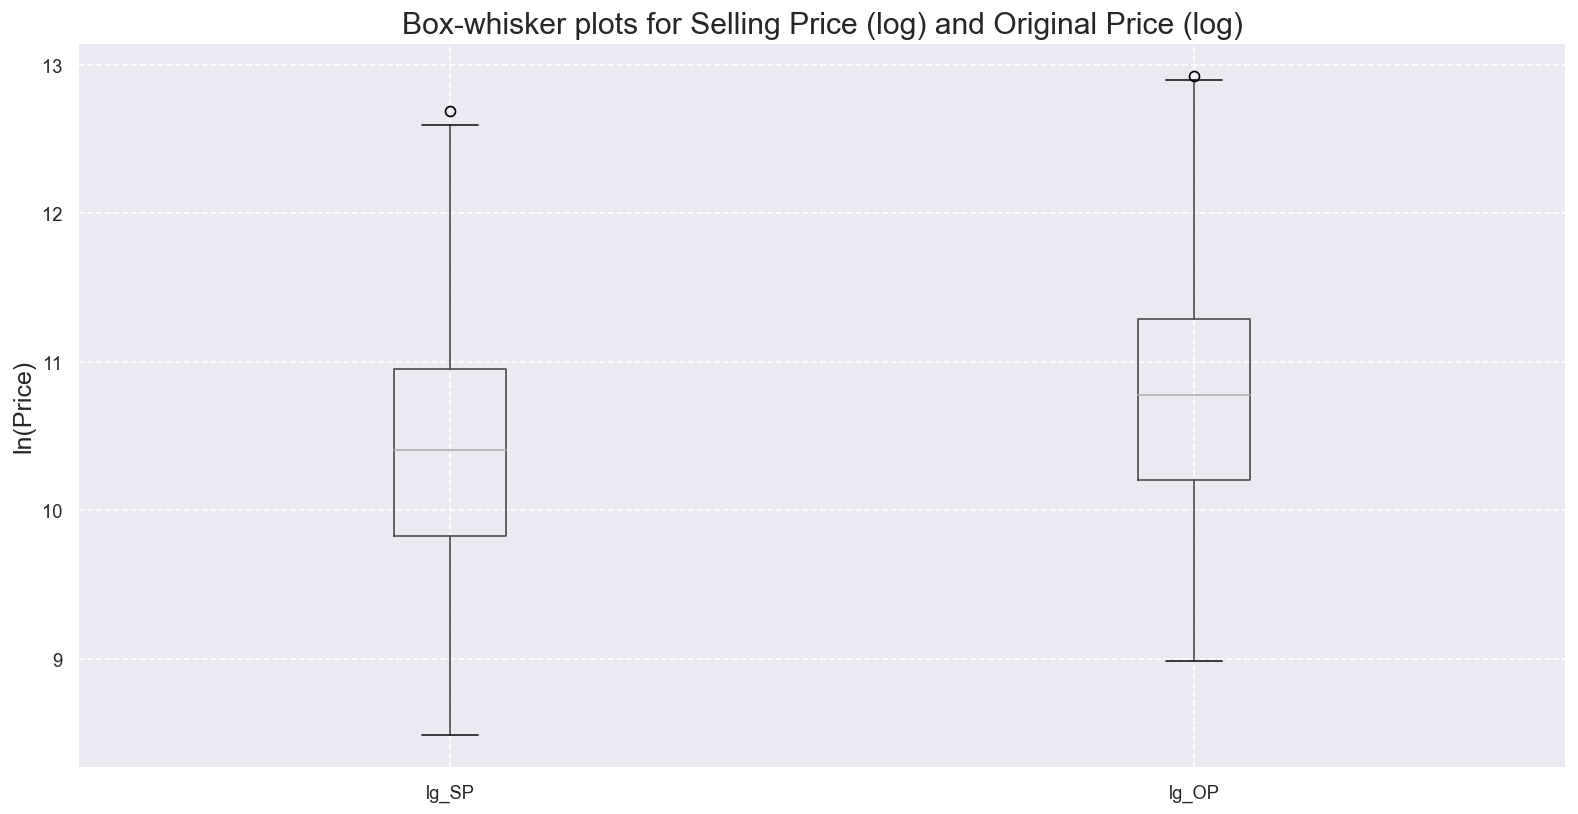

In [93]:
plt.figure(figsize=(16,8), dpi=120)
TV_dataset_preprocessing.boxplot(column=['lg_SP', 'lg_OP'])
plt.grid(linestyle='--')
plt.title('Box-whisker plots for Selling Price (log) and Original Price (log)', fontsize=18)
plt.ylabel('ln(Price)', fontsize=15)
plt.show()

After the elimination, these two prices' data looks better

In [95]:
TV_dataset_preprocessing[['Size ', 'Selling Price', 'Original Price', 'Discount Rate', 'Rating']].describe().apply(lambda x: x.round(4))

,Size,Selling Price,Original Price,Discount Rate,Rating
count,686.0000,686.0000,686.0000,686.0000,686.0000
mean,44.6195,48256.4534,68297.5875,0.2870,4.2360
std,11.6417,47685.4602,64000.9571,0.1777,0.3643
min,20.0000,4849.0000,7999.0000,0.0000,2.0000
25%,32.0000,18460.0000,27000.0000,0.1565,4.1000
50%,43.0000,32999.5000,47994.5000,0.2999,4.3000
75%,55.0000,56855.0000,79990.0000,0.4284,4.4000
max,85.0000,324990.0000,409990.0000,0.7106,5.0000


In [97]:
# Finally, export dataset
TV_dataset_preprocessing.to_csv('TV_dataset_preprocessing.csv', index=False)